In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/azamkhan/anaconda3/envs/nasa/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
prediction_outputs_dir = "../future_climate_inference_scripts/ml_prediction_outputs_no_doy"

climate_models = ["GFDL-ESM", "IPSL-CM6A-LR", "MPI-ESM1-2-HR", "MRI-ESM2-0"]
scenarios = ["HighEmission", "LowEmission"]
targets = ['Nitrate', 'Phosphate', 'Sediments']

historical_period = "1990-2019"
future_period = "2030-2059"

def read_csvs():
    dfs = []
    for model in climate_models:
        for scenario in scenarios:
            for target in targets:
                file_path = os.path.join(prediction_outputs_dir, f"{model}/{scenario}/{target}_raw_predictions.csv")
                df = pd.read_csv(file_path)
                df["Model"] = model
                df["Scenario"] = scenario
                df["Target"] = target
                dfs.append(df)
    return pd.concat(dfs)
                

In [3]:
import os

print(os.path.abspath(prediction_outputs_dir))


/Users/azamkhan/columbia/climate/swan_ml/future_climate_inference_scripts/ml_prediction_outputs_no_doy


In [4]:
dfs = read_csvs()

In [5]:
dfs

,Date,Predicted,Model,Scenario,Target
0,1985-01-08 00:00:00+00:00,1259.101300,GFDL-ESM,HighEmission,Nitrate
1,1985-01-09 00:00:00+00:00,1218.837600,GFDL-ESM,HighEmission,Nitrate
2,1985-01-10 00:00:00+00:00,1634.833500,GFDL-ESM,HighEmission,Nitrate
3,1985-01-11 00:00:00+00:00,1280.105200,GFDL-ESM,HighEmission,Nitrate
4,1985-01-12 00:00:00+00:00,1306.366200,GFDL-ESM,HighEmission,Nitrate
...,...,...,...,...,...
28477,2062-12-27 00:00:00+00:00,43.959244,MRI-ESM2-0,LowEmission,Sediments
28478,2062-12-28 00:00:00+00:00,15.204775,MRI-ESM2-0,LowEmission,Sediments
28479,2062-12-29 00:00:00+00:00,15.522303,MRI-ESM2-0,LowEmission,Sediments
28480,2062-12-30 00:00:00+00:00,14.643012,MRI-ESM2-0,LowEmission,Sediments


In [8]:
# clip negative values in Predicted column

dfs["Predicted"] = dfs["Predicted"].clip(lower=0)


In [9]:
historical_period_start_date = '1987-01-01'
historical_period_end_date = '2019-12-31'

future_period_start_date = '2030-01-01'
future_period_end_date = '2062-12-31'

dfs["Date"] = pd.to_datetime(dfs["Date"])

historical_data = dfs[(dfs["Date"] >= historical_period_start_date) & (dfs["Date"] <= historical_period_end_date)]
future_data = dfs[(dfs["Date"] >= future_period_start_date) & (dfs["Date"] <= future_period_end_date)]

In [10]:
historical_data['month'] = historical_data['Date'].dt.to_period('M')
historical_data_monthly = (
    historical_data.groupby(['month', 'Model', 'Scenario', 'Target'])['Predicted'].agg(
        'sum'
    ).reset_index()
)

future_data["month"] = future_data["Date"].dt.to_period("M")
future_data_monthly = (
    future_data.groupby(["month", "Model", "Scenario", "Target"])["Predicted"]
    .agg("sum")
    .reset_index()
)


/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/3200810665.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  historical_data['month'] = historical_data['Date'].dt.to_period('M')
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/3200810665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_data['month'] = historical_data['Date'].dt.to_period('M')
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/3200810665.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  future_data["month"] = future_data["Date"].dt.to_period("M")
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/3200810665.p

In [11]:
# take model ensemble mean

historical_data.drop(columns=["Model"], inplace=True)
historical_data_ensemble = (
    historical_data.groupby(["Scenario", "Target", "Date"]).mean().reset_index()
)
future_data.drop(columns=["Model"], inplace=True)
future_data_ensemble = (
    future_data.groupby(["Scenario", "Target", "Date"]).mean().reset_index()
)


/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/2935508526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_data.drop(columns=["Model"], inplace=True)
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/2935508526.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_data.drop(columns=["Model"], inplace=True)


In [12]:
historical_data_ensemble["month"] = historical_data_ensemble["Date"].dt.to_period("M")
historical_data_ensemble_monthly = (
    historical_data_ensemble.groupby(["month", "Scenario", "Target"])["Predicted"]
    .agg("sum")
    .reset_index()
)

future_data_ensemble["month"] = future_data_ensemble["Date"].dt.to_period("M")
future_data_ensemble_monthly = (
    future_data_ensemble.groupby(["month", "Scenario", "Target"])["Predicted"]
    .agg("sum")
    .reset_index()
)


/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/32058385.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  historical_data_ensemble["month"] = historical_data_ensemble["Date"].dt.to_period("M")
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/32058385.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  future_data_ensemble["month"] = future_data_ensemble["Date"].dt.to_period("M")


In [13]:
historical_data_ensemble_monthly


,month,Scenario,Target,Predicted
0,1987-01,HighEmission,Nitrate,44270.725992
1,1987-01,HighEmission,Phosphate,1094.133778
2,1987-01,HighEmission,Sediments,3706.910499
3,1987-01,LowEmission,Nitrate,44468.250963
4,1987-01,LowEmission,Phosphate,1094.990907
...,...,...,...,...
2371,2019-12,HighEmission,Phosphate,978.058710
2372,2019-12,HighEmission,Sediments,2046.110833
2373,2019-12,LowEmission,Nitrate,45689.168102
2374,2019-12,LowEmission,Phosphate,1056.551205


In [14]:
historical_data_ensemble_monthly.rename(columns={'month': 'Date'}, inplace=True)
future_data_ensemble_monthly.rename(columns={'month': 'Date'}, inplace=True)

In [15]:
future_data_ensemble_monthly

nitrate_future_data_ensemble_monthly = future_data_ensemble_monthly[future_data_ensemble_monthly["Target"] == "Nitrate"]


In [16]:
nitrate_future_data_ensemble_monthly_he = nitrate_future_data_ensemble_monthly[nitrate_future_data_ensemble_monthly["Scenario"] == "HighEmission"]
nitrate_future_data_ensemble_monthly_he.drop(columns=["Scenario", "Target"], inplace=True)
nitrate_future_data_ensemble_monthly_he['month'] = nitrate_future_data_ensemble_monthly_he['Date'].dt.month



/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/1064167162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nitrate_future_data_ensemble_monthly_he.drop(columns=["Scenario", "Target"], inplace=True)
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/1064167162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nitrate_future_data_ensemble_monthly_he['month'] = nitrate_future_data_ensemble_monthly_he['Date'].dt.month


In [17]:
wq_monthly_avg = (
    nitrate_future_data_ensemble_monthly_he[["Predicted", "month"]]
    .groupby("month")
    .mean()
    .reset_index()
)


In [18]:
wq_monthly_avg


,month,Predicted
0,1,57043.874275
1,2,60925.559044
2,3,63817.918655
3,4,28684.621060
4,5,18960.624256
5,6,14493.117823
6,7,13379.265504
7,8,9902.750433
8,9,13601.526844
9,10,27706.039835


In [19]:
wq_monthly_avg


,month,Predicted
0,1,57043.874275
1,2,60925.559044
2,3,63817.918655
3,4,28684.621060
4,5,18960.624256
5,6,14493.117823
6,7,13379.265504
7,8,9902.750433
8,9,13601.526844
9,10,27706.039835


In [20]:
nitrate_future_data_ensemble_monthly_he


,Date,Predicted,month
0,2030-01,58587.632425,1
6,2030-02,61930.009075,2
12,2030-03,51589.426153,3
18,2030-04,27155.581223,4
24,2030-05,21302.608335,5
...,...,...,...
2346,2062-08,12398.103794,8
2352,2062-09,11974.117446,9
2358,2062-10,37816.700182,10
2364,2062-11,38088.306162,11


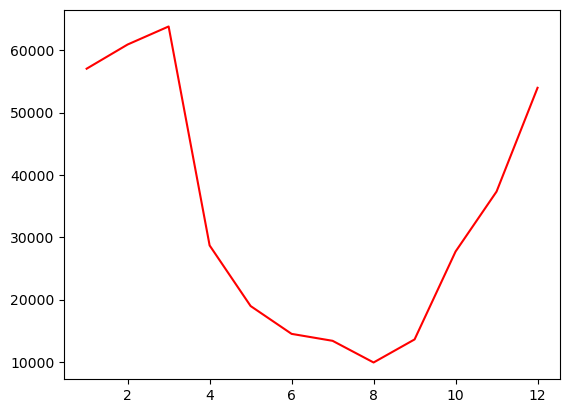

In [21]:
plt.plot(
    wq_monthly_avg["month"],
    wq_monthly_avg["Predicted"],
    color="red",
    label="Nitrate",
)


In [22]:
future_data_ensemble_monthly

,Date,Scenario,Target,Predicted
0,2030-01,HighEmission,Nitrate,58587.632425
1,2030-01,HighEmission,Phosphate,1511.634351
2,2030-01,HighEmission,Sediments,5160.943017
3,2030-01,LowEmission,Nitrate,61078.031960
4,2030-01,LowEmission,Phosphate,1690.434523
...,...,...,...,...
2371,2062-12,HighEmission,Phosphate,1755.977283
2372,2062-12,HighEmission,Sediments,5130.759510
2373,2062-12,LowEmission,Nitrate,54720.178305
2374,2062-12,LowEmission,Phosphate,1753.396179


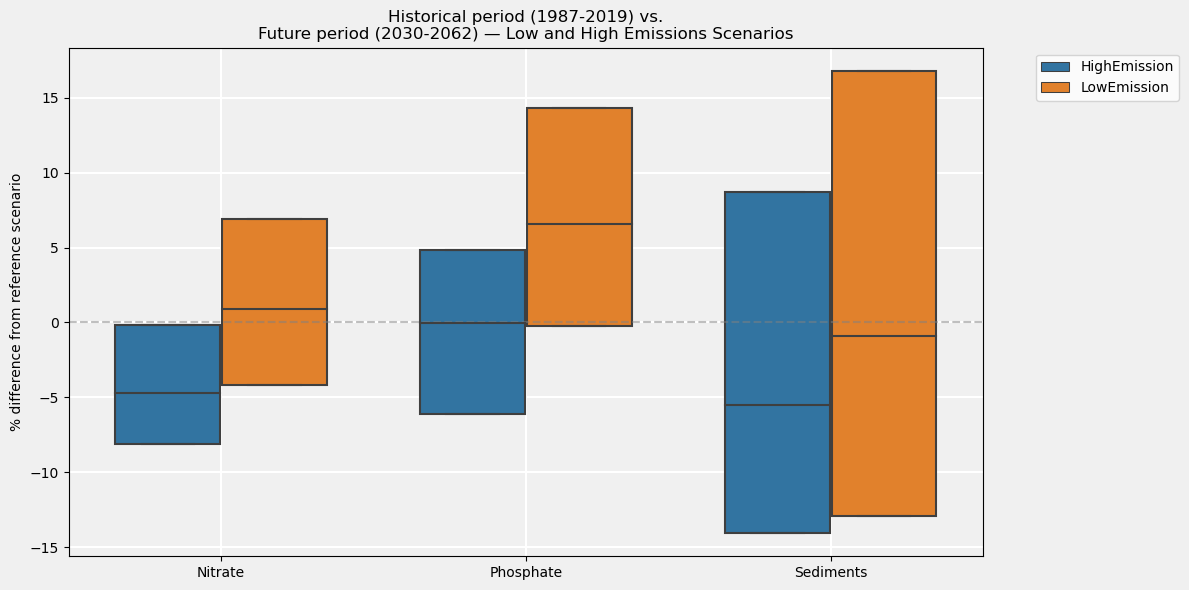


Annual Average Differences:
   Target     Scenario  Pct_Difference
  Nitrate HighEmission           -4.45
  Nitrate  LowEmission            1.08
Phosphate HighEmission           -0.32
Phosphate  LowEmission            6.86
Sediments HighEmission           -3.75
Sediments  LowEmission            1.48


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_annual_comparison(future_data, historical_data):
    """
    Create a comparison plot showing annual average differences from historical reference.
    """
    # Convert the date column to datetime if it's not already
    future_data["Date"] = pd.to_datetime(future_data["Date"])
    historical_data["Date"] = pd.to_datetime(historical_data["Date"])

    # Extract the year from the date column
    future_data["Year"] = future_data["Date"].dt.year
    historical_data["Year"] = historical_data["Date"].dt.year

    # Calculate reference values from historical data (annual means)
    historical_annual_means = (
        historical_data.groupby(["Target", "Year"])["Predicted"].mean().reset_index()
    )
    historical_means = historical_annual_means.groupby("Target")["Predicted"].mean()

    # Calculate annual means for future data
    future_annual_means = (
        future_data.groupby(["Target", "Scenario", "Year"])["Predicted"]
        .mean()
        .reset_index()
    )

    # Calculate percentage differences for future data
    future_annual_means["Pct_Difference"] = future_annual_means.apply(
        lambda row: (
            (row["Predicted"] - historical_means[row["Target"]])
            / historical_means[row["Target"]]
            * 100
        ),
        axis=1,
    )

    # Set up the plot
    plt.figure(figsize=(12, 6))

    # Create the boxplot
    ax = plt.gca()
    sns.boxplot(
        x="Target",
        y="Pct_Difference",
        hue="Scenario",
        data=future_annual_means,
        width=0.7,
        ax=ax,
        showfliers=False,
        whis=0
    )

    # Customize the plot
    plt.title(
        "Historical period (1987-2019) vs.\nFuture period (2030-2062) — Low and High Emissions Scenarios"
    )
    plt.ylabel("% difference from reference scenario")
    plt.xlabel("")

    # Set background color and grid
    ax.set_facecolor("#f0f0f0")
    plt.grid(True, color="white", linestyle="-", linewidth=1.5)
    ax.set_axisbelow(True)
    plt.gca().patch.set_facecolor("#f0f0f0")
    plt.gcf().patch.set_facecolor("#f0f0f0")

    # Add horizontal line at 0%
    plt.axhline(y=0, color="gray", linestyle="--", alpha=0.5)

    # Adjust legend position and layout
    plt.legend(title="", bbox_to_anchor=(1.05, 1), loc="upper left")

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    plt.show()

    # Print average values for verification
    print("\nAnnual Average Differences:")
    print(
        future_annual_means.groupby(["Target", "Scenario"])["Pct_Difference"]
        .mean()
        .reset_index()
        .round(2)
        .to_string(index=False)
    )
    return future_annual_means


# Usage
fut = plot_annual_comparison(future_data_ensemble, historical_data_ensemble)


/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/2989162623.py:10: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(future_data["Date"]):
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/2989162623.py:16: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(historical_data["Date"]):


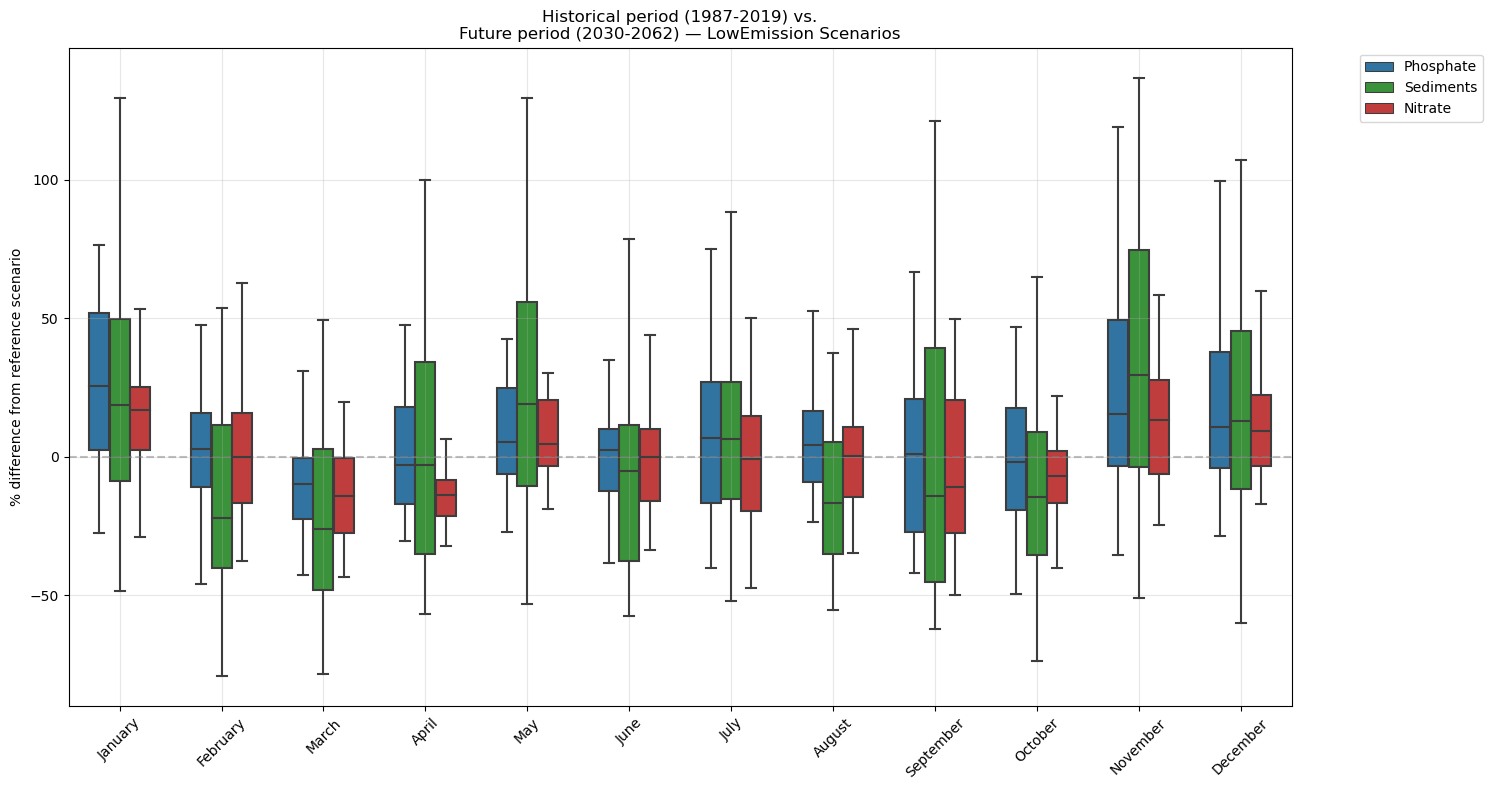

/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/2989162623.py:10: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(future_data["Date"]):
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/2989162623.py:16: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(historical_data["Date"]):


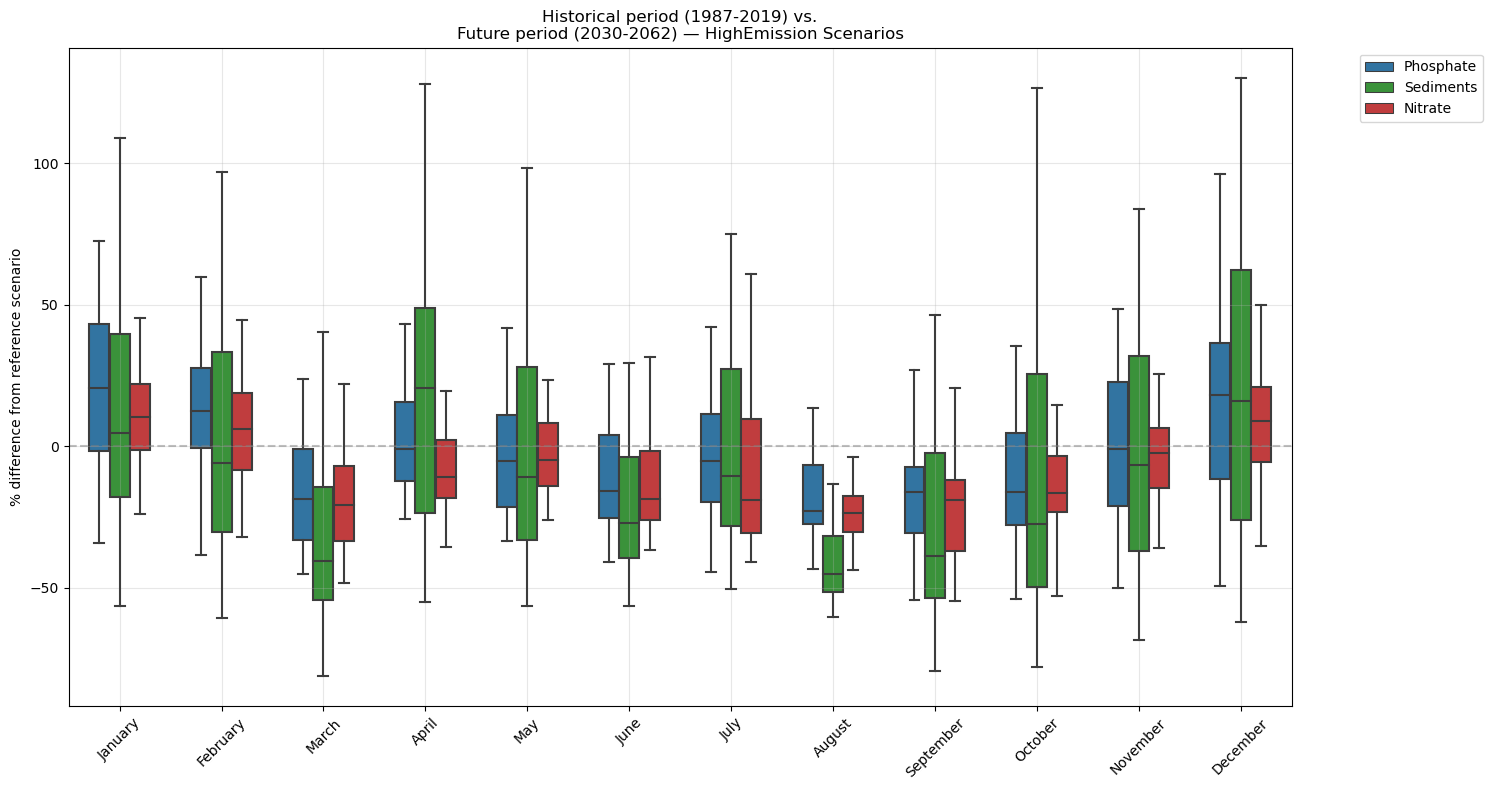

In [24]:
def plot_monthly_comparison(
    future_data, historical_data, emission_scenario="LowEmission"
):
    """
    Create a monthly comparison plot showing differences from historical reference for all targets.
    """
    # Extract month from the Date column
    future_data = future_data.copy()
    future_data = future_data[future_data["Scenario"] == emission_scenario]
    if pd.api.types.is_period_dtype(future_data["Date"]):
        future_data["Date"] = future_data["Date"].dt.to_timestamp()
    future_data["Month"] = pd.to_datetime(future_data["Date"]).dt.strftime("%B")

    # Calculate reference values from historical data
    historical_data = historical_data.copy()
    if pd.api.types.is_period_dtype(historical_data["Date"]):
        historical_data["Date"] = historical_data["Date"].dt.to_timestamp()
    historical_data["Month"] = pd.to_datetime(historical_data["Date"]).dt.strftime("%B")
    reference_values = (
        historical_data.groupby(["Target", "Month"])["Predicted"].mean().reset_index()
    )

    # Merge with future data and calculate differences
    future_merged = future_data.merge(
        reference_values, on=["Target", "Month"], suffixes=("_future", "_historical")
    )
    future_merged["Pct_Difference"] = (
        (future_merged["Predicted_future"] - future_merged["Predicted_historical"])
        / future_merged["Predicted_historical"]
        * 100
    )

    # Set up the plot
    plt.figure(figsize=(15, 8))

    # Create month order
    month_order = [
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ]

    # Define the target order and corresponding colors using sns.color_palette("tab10")
    target_order = ["Phosphate", "Sediments", "Nitrate"]
    tab10_palette = sns.color_palette("tab10")
    target_colors = {
        "Phosphate": tab10_palette[0],  # Blue
        "Sediments": tab10_palette[2],  # Orange
        "Nitrate": tab10_palette[3],  # Green
    }

    # Create the boxplot
    sns.boxplot(
        x="Month",
        y="Pct_Difference",
        hue="Target",
        data=future_merged,
        order=month_order,
        hue_order=target_order,  # Ensure the targets appear in the desired order
        palette=target_colors,  # Assign specific colors to each target
        width=0.6,
        showfliers=False,
        # whis=0,

    )

    # Customize the plot
    plt.title(
        f"Historical period (1987-2019) vs.\nFuture period (2030-2062) — {emission_scenario} Scenarios"
    )
    plt.ylabel("% difference from reference scenario")
    plt.xlabel("")

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha="center")

    # Add horizontal line at 0%
    plt.axhline(y=0, color="gray", linestyle="--", alpha=0.5)

    # Adjust legend position and layout
    plt.legend(title="", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, alpha=0.3)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    plt.show()

    return future_merged


# Usage
le = plot_monthly_comparison(future_data_ensemble_monthly, 
historical_data_ensemble_monthly, emission_scenario="LowEmission")
he = plot_monthly_comparison(
    future_data_ensemble_monthly,
    
    historical_data_ensemble_monthly,
    emission_scenario="HighEmission",
)


# SWAT ANALYSES

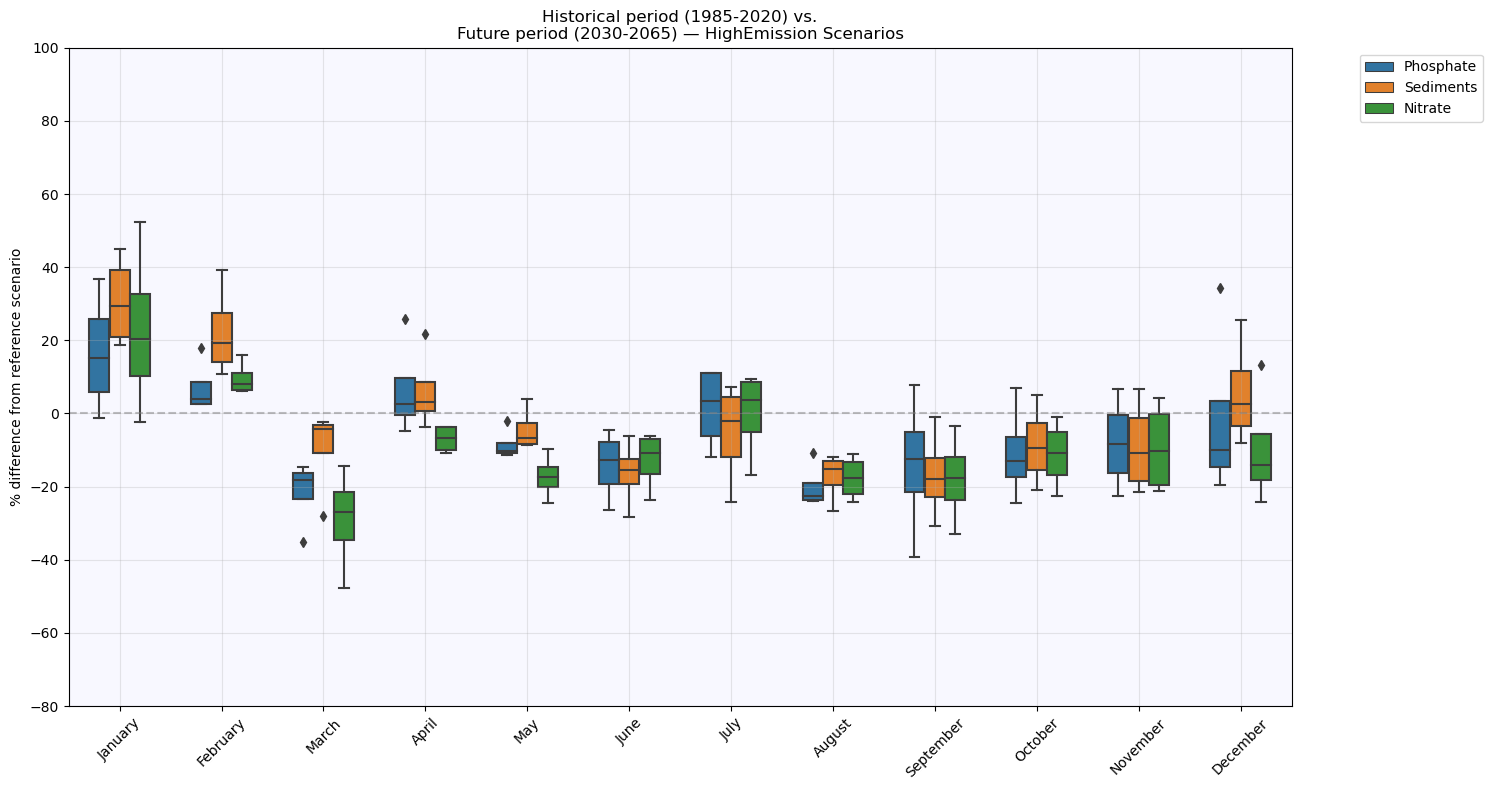

In [25]:
swat_df = pd.read_csv("../data/SeasonalOutputsssp370.csv")
swat_df.rename(columns={"variable": "Month", "value": 'percent_diff_from_ref_scenario'}, inplace=True)
# drop values where treatment equals "Streamflow"
swat_df = swat_df[swat_df["treatment"] != "Streamflow"]

month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

# plot box plot
plt.figure(figsize=(15, 8))

# hue treatment mapping to color
treatment_color_mapping  = {
    "Phosphate": "lightblue",
    "Sediments": "green",
    "Nitrate": "red",
    # "Streamflow": "purple",
}

sns.boxplot(
    x="Month",
    y="percent_diff_from_ref_scenario",
    hue="treatment",
    data=swat_df,
    order=month_order,
    hue_order=["Phosphate", "Sediments", "Nitrate"],#, "Streamflow"],
    width=0.6,
    palette=sns.color_palette("tab10")
)

plt.title("Historical period (1985-2020) vs.\nFuture period (2030-2065) — HighEmission Scenarios")
plt.ylabel("% difference from reference scenario")
plt.xlabel("")
plt.xticks(rotation=45, ha="center")
plt.axhline(y=0, color="gray", linestyle="--", alpha=0.5)
plt.legend(title="", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)

# Set background color to sky blue
ax = plt.gca()
ax.set_facecolor("ghostwhite")
# plt.gcf().patch.set_facecolor("skyblue")

# Set y-axis limits
plt.ylim(-80, 100)

plt.tight_layout()
plt.show()

## Correlation Analysis

In [26]:
le_percent_diff = le[["Month", "Target", "Pct_Difference"]]
le_percent_diff.rename(
    columns={"Pct_Difference": "percent_diff_from_ref_scenario", "Target": "treatment"},
    inplace=True,
)
# sort by january to december in month column then by treatment
le_percent_diff["Month"] = pd.Categorical(
    le_percent_diff["Month"], categories=month_order, ordered=True
)
le_percent_diff.sort_values(by=["Month", "treatment"], inplace=True)


he_percent_diff = he[["Month", "Target", "Pct_Difference"]]
he_percent_diff.rename(
    columns={"Pct_Difference": "percent_diff_from_ref_scenario", "Target": "treatment"},
    inplace=True,
)
# sort by january to december in month column then by treatment
he_percent_diff["Month"] = pd.Categorical(
    he_percent_diff["Month"], categories=month_order, ordered=True
)
he_percent_diff.sort_values(by=["Month", "treatment"], inplace=True)


/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/3943252436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  le_percent_diff.rename(
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/3943252436.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  le_percent_diff["Month"] = pd.Categorical(
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/3943252436.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [27]:
le_percent_diff['Source'] = 'ML'
he_percent_diff['Source'] = 'ML'
swat_df['Source'] = 'SWAT'

/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/3139005938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  le_percent_diff['Source'] = 'ML'
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/3139005938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  he_percent_diff['Source'] = 'ML'


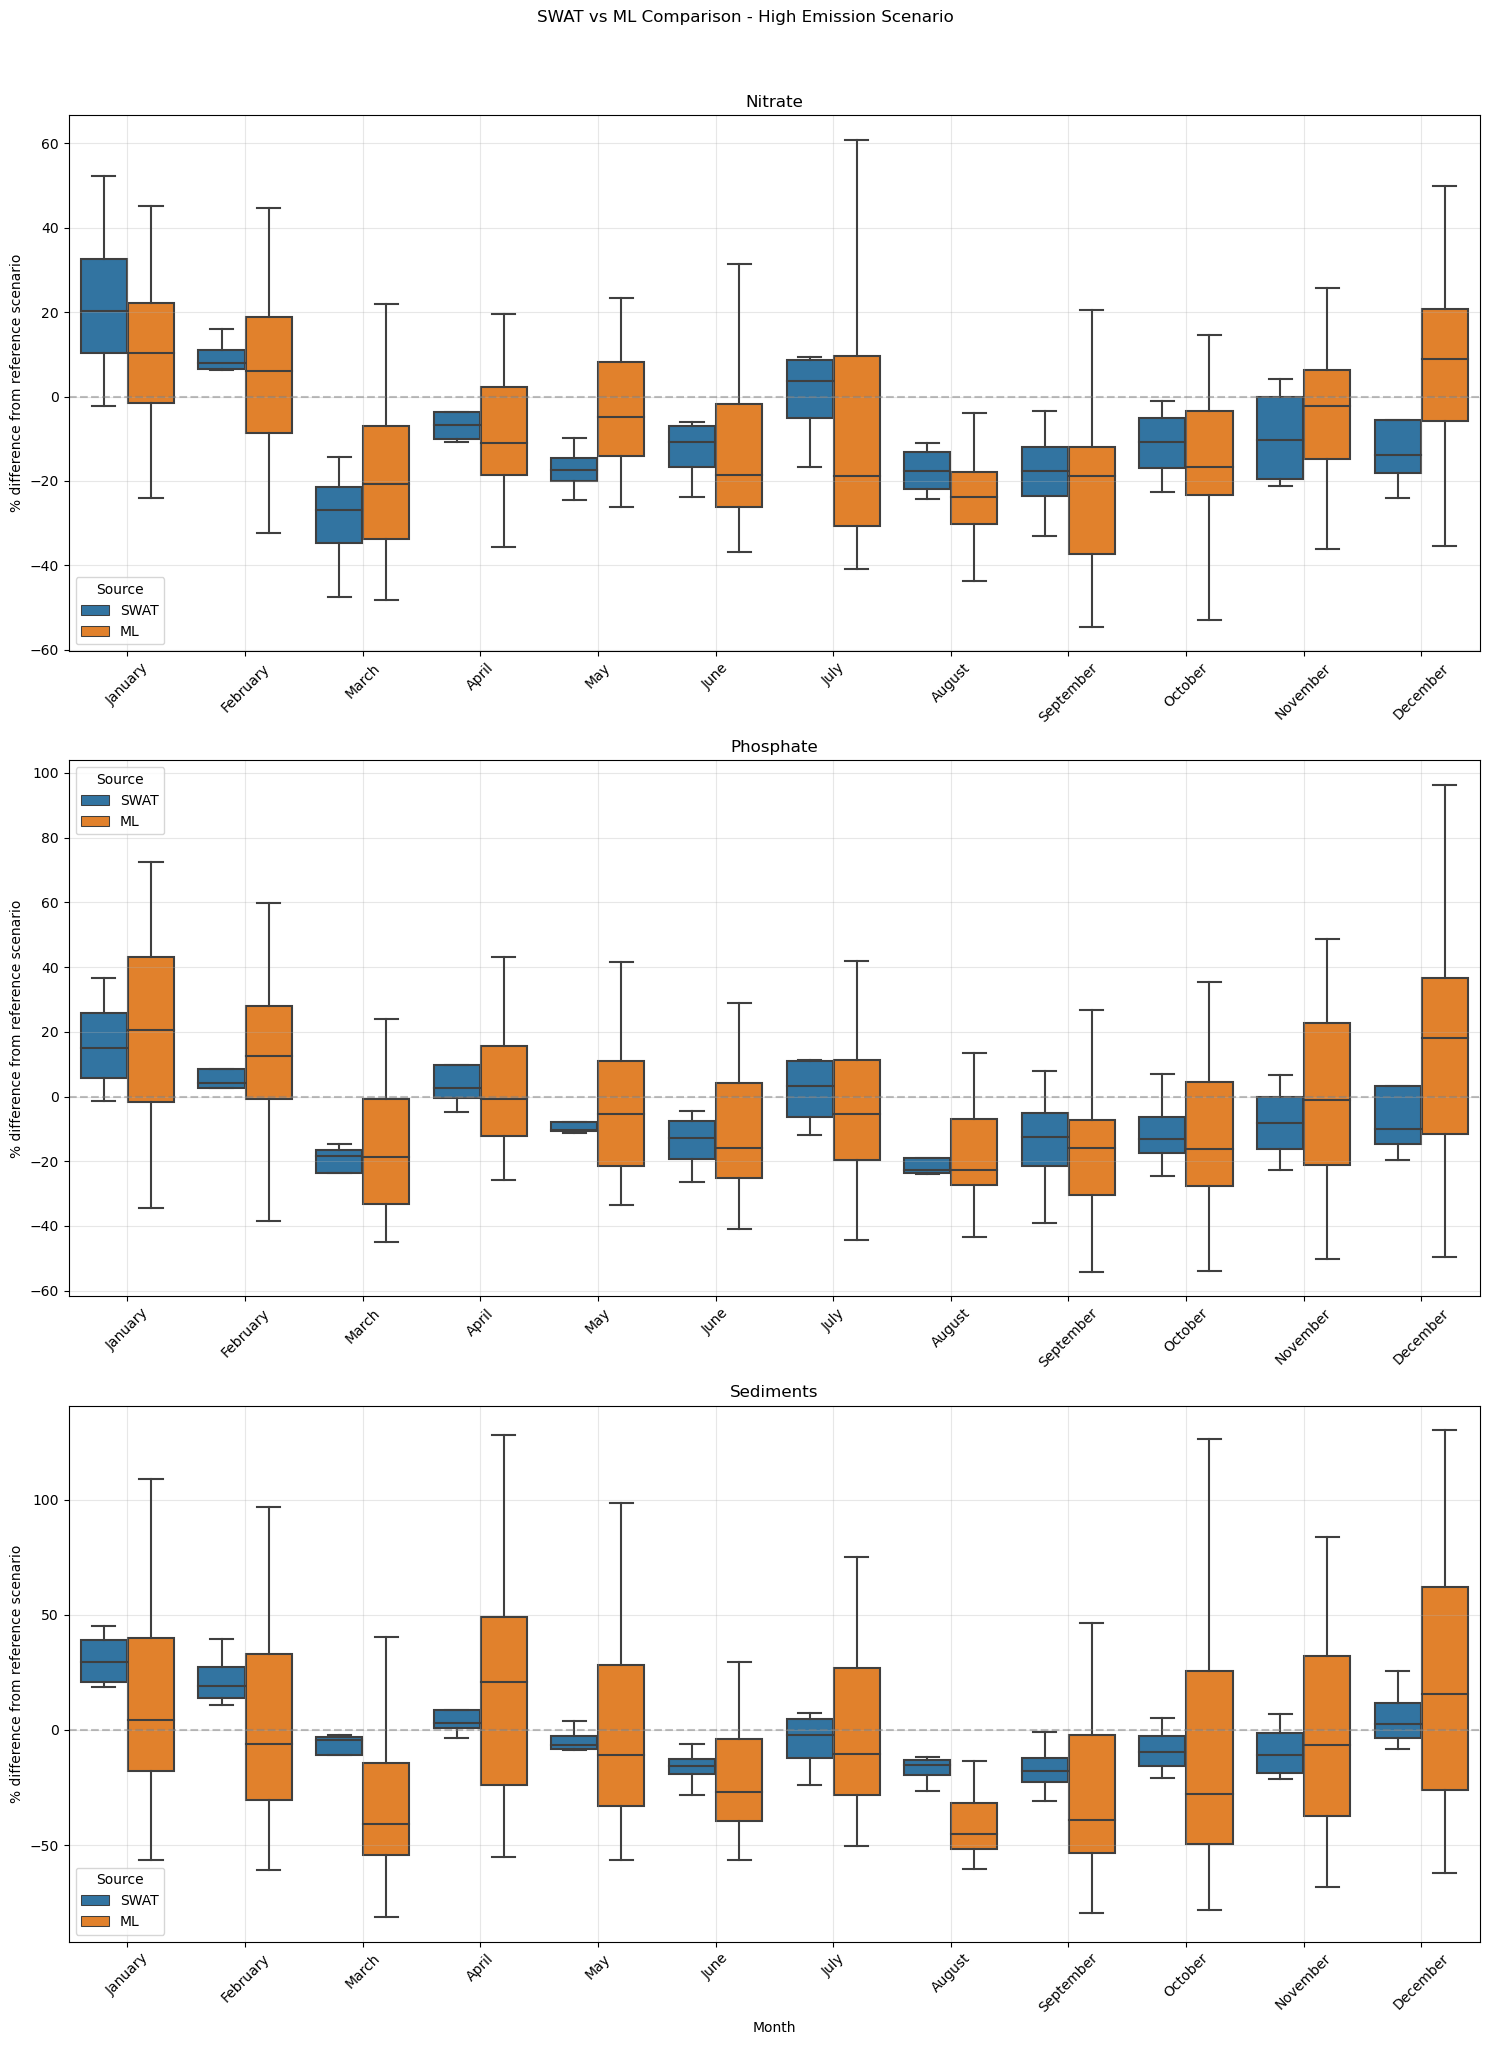

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 20))

# Plot for Nitrate
sns.boxplot(
    data=pd.concat(
        [
            swat_df[swat_df["treatment"] == "Nitrate"],
            he_percent_diff[he_percent_diff["treatment"] == "Nitrate"],
        ]
    ),
    x="Month",
    y="percent_diff_from_ref_scenario",
    hue="Source",
    order=month_order,
    showfliers=False,
    ax=ax1,
)
ax1.set_title("Nitrate")
ax1.set_xlabel("")
ax1.axhline(y=0, color="gray", linestyle="--", alpha=0.5)

# Plot for Phosphate
sns.boxplot(
    data=pd.concat(
        [
            swat_df[swat_df["treatment"] == "Phosphate"],
            he_percent_diff[he_percent_diff["treatment"] == "Phosphate"],
        ]
    ),
    x="Month",
    y="percent_diff_from_ref_scenario",
    hue="Source",
    order=month_order,
    showfliers=False,
    ax=ax2,
)
ax2.set_title("Phosphate")
ax2.set_xlabel("")
ax2.axhline(y=0, color="gray", linestyle="--", alpha=0.5)

# Plot for Sediments
sns.boxplot(
    data=pd.concat(
        [
            swat_df[swat_df["treatment"] == "Sediments"],
            he_percent_diff[he_percent_diff["treatment"] == "Sediments"],
        ]
    ),
    x="Month",
    y="percent_diff_from_ref_scenario",
    hue="Source",
    order=month_order,
    showfliers=False,
    ax=ax3,
)
ax3.set_title("Sediments")
ax3.set_xlabel("Month")
ax3.axhline(y=0, color="gray", linestyle="--", alpha=0.5)

# Rotate x-axis labels for better readability
for ax in [ax1, ax2, ax3]:
    ax.tick_params(axis="x", rotation=45)
    ax.set_ylabel("% difference from reference scenario")
    ax.grid(True, alpha=0.3)

plt.suptitle("SWAT vs ML Comparison - High Emission Scenario", y=1.02)
plt.tight_layout()
plt.show()


# SHAP ANALYSIS

In [29]:
import shap
import matplotlib.pyplot as plt
import mlflow
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

run_id_model_mapping = {
    "Sediments DlyLd(kg*1000)": "7dbc2f38bdda4a7b865971cfbc3b0b9e",
    "Nitrate DlyLd(kg)": "f7a1076fd4214612822c27002eaaf017",
    "Phosphate DlyLd(kg)": "ee57487119f54539967d5002b8ac6268",
}


# load shap values
prediction_outputs_dir = "../future_climate_inference_scripts/ml_prediction_outputs_no_doy"

climate_models = ["GFDL-ESM", "IPSL-CM6A-LR", "MPI-ESM1-2-HR", "MRI-ESM2-0"]
scenarios = ["HighEmission", "LowEmission"]
targets = ["Nitrate", "Phosphate", "Sediments"]

historical_period = "1990-2019"
future_period = "2030-2059"


def read_csvs_shap():
    dfs = {model: {scenario: {} for scenario in scenarios} for model in climate_models}
    for model in climate_models:
        for scenario in scenarios:
            for target in targets:
                file_path = os.path.join(
                    prediction_outputs_dir,
                    f"{model}/{scenario}/shap_values/{target}_attributions.csv",
                )
                df = pd.read_csv(file_path)
                df["Model"] = model
                df["Scenario"] = scenario
                df["Target"] = target
                # make these the first three columns
                cols = df.columns.tolist()
                cols = cols[-3:] + cols[:-3]
                df = df[cols]
                
                dfs[model][scenario][target] = df
    return dfs

In [30]:
shap_dfs = read_csvs_shap()

In [31]:
# function to load average shap dataframe for a given model, scenario and target
def load_average_shap_df(scenario, target):
    shap_df1 = shap_dfs["GFDL-ESM"][scenario][target]
    shap_df2 = shap_dfs["IPSL-CM6A-LR"][scenario][target]
    shap_df3 = shap_dfs["MPI-ESM1-2-HR"][scenario][target]
    shap_df4 = shap_dfs["MRI-ESM2-0"][scenario][target]

    concated_df = pd.concat(
            [
                shap_df1,
                shap_df2,
                shap_df3,
                shap_df4,
            ])
    group_cols = ["Scenario", "Target", "Date"]
    df_numeric = concated_df.drop(columns=["Model"])
    ensemble_avg_df = df_numeric.groupby(group_cols).mean().reset_index()
    return ensemble_avg_df
    

def load_ensemble_target_df(scenario, target):
    df1 = dfs[
        (dfs["Model"] == "GFDL-ESM")
        & (dfs["Scenario"] == scenario)
        & (dfs["Target"] == target)
    ]
    df2 = dfs[
        (dfs["Model"] == "IPSL-CM6A-LR")
        & (dfs["Scenario"] == scenario)
        & (dfs["Target"] == target)
    ]
    df3 = dfs[
        (dfs["Model"] == "MPI-ESM1-2-HR")
        & (dfs["Scenario"] == scenario)
        & (dfs["Target"] == target)
    ]
    df4 = dfs[
        (dfs["Model"] == "MRI-ESM2-0")
        & (dfs["Scenario"] == scenario)
        & (dfs["Target"] == target)
    ]
    ensemble_df = pd.concat([df1, df2, df3, df4])
    # return ensemble_df

    ensemble_df["Date"] = pd.to_datetime(ensemble_df["Date"])
    group_cols = ["Scenario", "Target", "Date"]
    df_numeric = ensemble_df.drop(columns=["Model"])
    ensemble_df = df_numeric.groupby(group_cols).mean().reset_index()
    return ensemble_df


In [33]:
import json
shap.initjs()
mlflow.set_tracking_uri("file:///Users/azamkhan/columbia/climate/swan_ml/mlruns")
run_id_model_mapping = {
    "Sediments": "7dbc2f38bdda4a7b865971cfbc3b0b9e",
    "Nitrate": "f7a1076fd4214612822c27002eaaf017",
    "Phosphate": "ee57487119f54539967d5002b8ac6268",
}

def select_features(target, run_id_model_mapping):
    run_id = run_id_model_mapping[target]
    artifact_path = f"{target.split(' ')[0]}_tabnet_input_features.json"
    local_path = mlflow.artifacts.download_artifacts(
        run_id=run_id, artifact_path=artifact_path
    )
    with open(local_path, "r") as f:
        loaded_dict = json.load(f)
    return loaded_dict["input_features"]

def get_shap_analysis(scenario, target):
    shap_df = load_average_shap_df(scenario, target)
    target_df = load_ensemble_target_df(scenario, target)
    features = select_features(target, run_id_model_mapping)
    # shap_values = shap_df[features]
    return shap_df, target_df, features



In [34]:
nitrate_LE_shap, nitrate_LE_ensemble, nitrate_LE_features = get_shap_analysis("LowEmission", "Nitrate")
nitrate_HE_shap, nitrate_HE_ensemble, nitrate_HE_features = get_shap_analysis(
    "HighEmission", "Nitrate"
)

phosphate_LE_shap, phosphate_LE_ensemble, phosphate_LE_features = get_shap_analysis(
    "LowEmission", "Phosphate"
)
phosphate_HE_shap, phosphate_HE_ensemble, phosphate_HE_features = get_shap_analysis(
    "HighEmission", "Phosphate"
)

sediments_LE_shap, sediments_LE_ensemble, sediments_LE_features = get_shap_analysis(
    "LowEmission", "Sediments"
)
sediments_HE_shap, sediments_HE_ensemble, sediments_HE_features = get_shap_analysis(
    "HighEmission", "Sediments"
)

### Nitrate

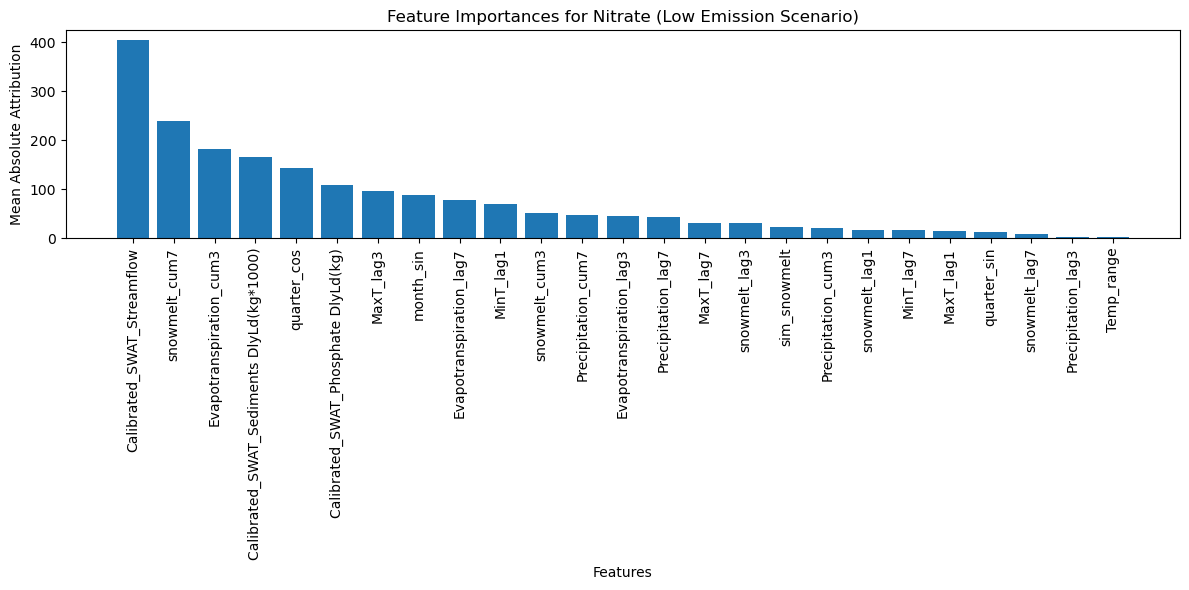

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# --- Compute mean absolute attribution per feature ---
mean_abs_attributions = nitrate_LE_shap[nitrate_LE_features].abs().mean(axis=0)

# --- Sort features by importance ---
sorted_idx = np.argsort(mean_abs_attributions)[::-1]
sorted_features_nitrate_le = mean_abs_attributions.index[sorted_idx]
sorted_importances = mean_abs_attributions.values[sorted_idx]

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_features_nitrate_le)), sorted_importances)
plt.xticks(range(len(sorted_features_nitrate_le)), sorted_features_nitrate_le, rotation=90)
plt.title(f"Feature Importances for Nitrate (Low Emission Scenario)")
plt.ylabel("Mean Absolute Attribution")
plt.xlabel("Features")
plt.tight_layout()
plt.show()




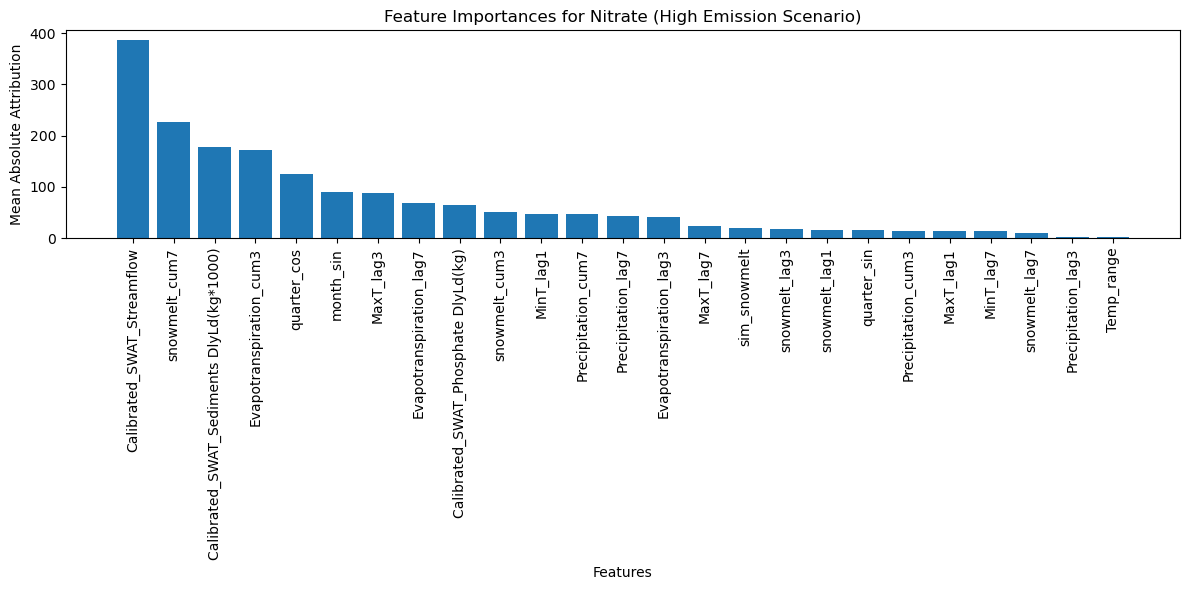

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# --- Compute mean absolute attribution per feature ---
mean_abs_attributions = nitrate_HE_shap[nitrate_HE_features].abs().mean(axis=0)

# --- Sort features by importance ---
sorted_idx = np.argsort(mean_abs_attributions)[::-1]
sorted_features_nitrate_he = mean_abs_attributions.index[sorted_idx]
sorted_importances = mean_abs_attributions.values[sorted_idx]

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_features_nitrate_he)), sorted_importances)
plt.xticks(range(len(sorted_features_nitrate_he)), sorted_features_nitrate_he, rotation=90)
plt.title(f"Feature Importances for Nitrate (High Emission Scenario)")
plt.ylabel("Mean Absolute Attribution")
plt.xlabel("Features")
plt.tight_layout()
plt.show()


### Sediments

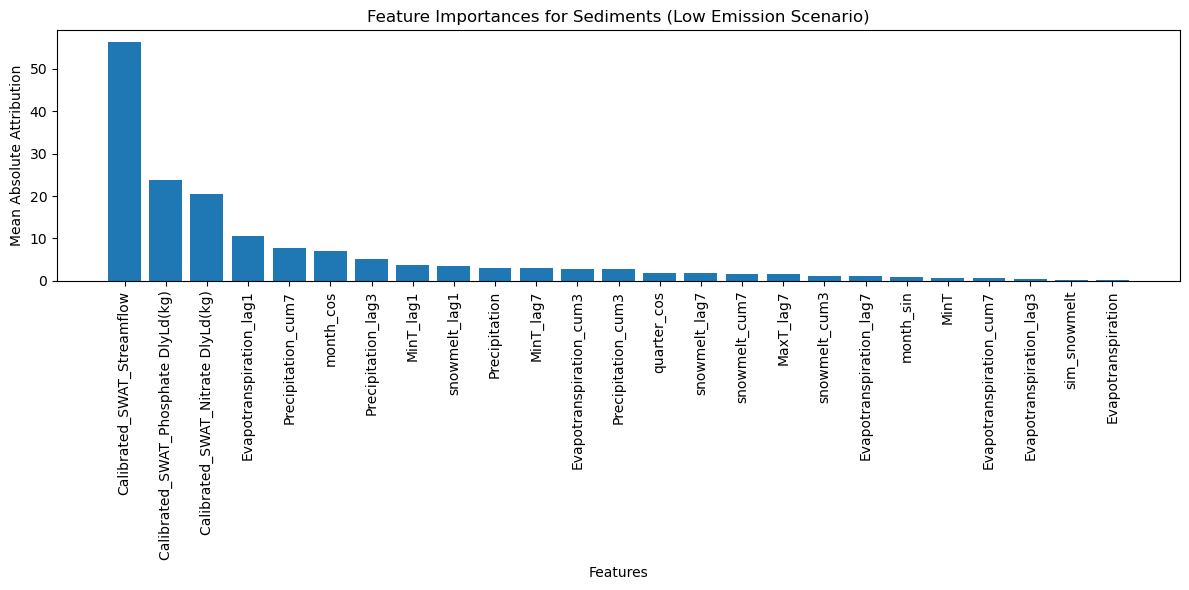

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# --- Compute mean absolute attribution per feature ---
mean_abs_attributions = sediments_LE_shap[sediments_LE_features].abs().mean(axis=0)

# --- Sort features by importance ---
sorted_idx = np.argsort(mean_abs_attributions)[::-1]
sorted_features_sediments_le = mean_abs_attributions.index[sorted_idx]
sorted_importances = mean_abs_attributions.values[sorted_idx]

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_features_sediments_le)), sorted_importances)
plt.xticks(range(len(sorted_features_sediments_le)), sorted_features_sediments_le, rotation=90)
plt.title(f"Feature Importances for Sediments (Low Emission Scenario)")
plt.ylabel("Mean Absolute Attribution")
plt.xlabel("Features")
plt.tight_layout()
plt.show()


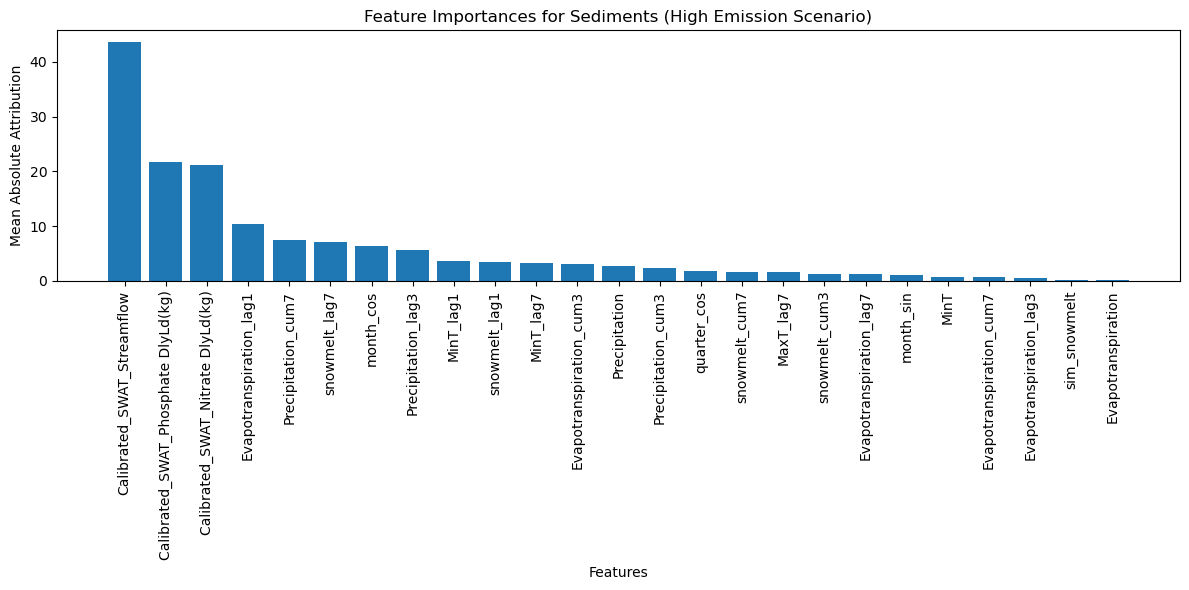

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# --- Compute mean absolute attribution per feature ---
mean_abs_attributions = sediments_HE_shap[sediments_HE_features].abs().mean(axis=0)

# --- Sort features by importance ---
sorted_idx = np.argsort(mean_abs_attributions)[::-1]
sorted_features_sediments_he = mean_abs_attributions.index[sorted_idx]
sorted_importances = mean_abs_attributions.values[sorted_idx]

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_features_sediments_he)), sorted_importances)
plt.xticks(range(len(sorted_features_sediments_he)), sorted_features_sediments_he, rotation=90)
plt.title(f"Feature Importances for Sediments (High Emission Scenario)")
plt.ylabel("Mean Absolute Attribution")
plt.xlabel("Features")
plt.tight_layout()
plt.show()


### Phosphate

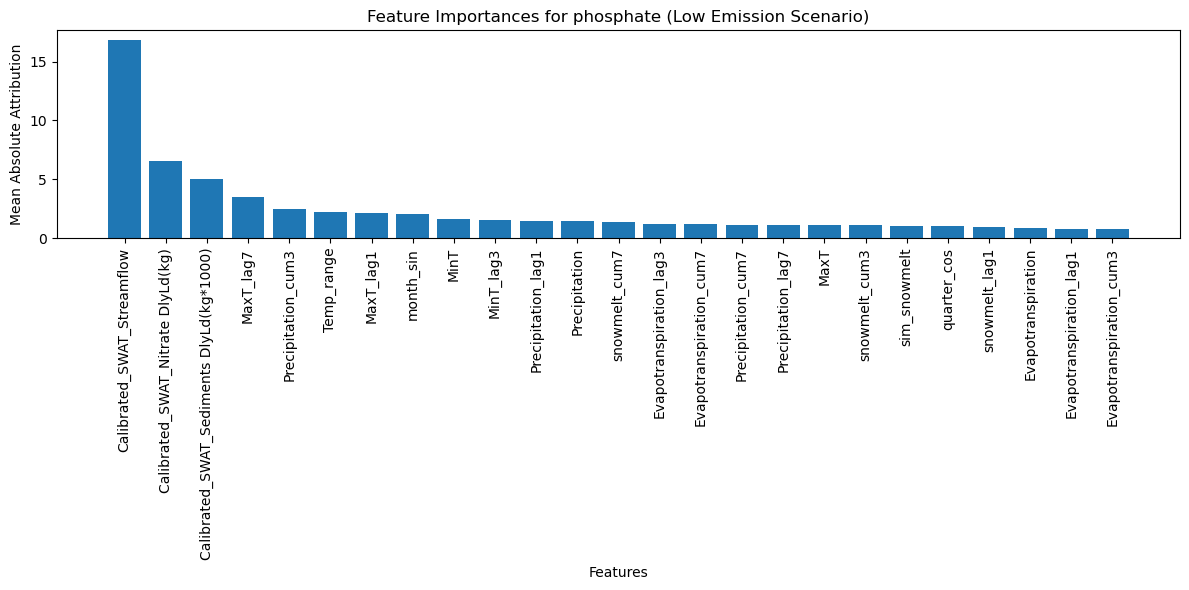

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# --- Compute mean absolute attribution per feature ---
mean_abs_attributions = phosphate_LE_shap[phosphate_LE_features].abs().mean(axis=0)

# --- Sort features by importance ---
sorted_idx = np.argsort(mean_abs_attributions)[::-1]
sorted_features_phosphate_le = mean_abs_attributions.index[sorted_idx]
sorted_importances = mean_abs_attributions.values[sorted_idx]

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_features_phosphate_le)), sorted_importances)
plt.xticks(range(len(sorted_features_phosphate_le)), sorted_features_phosphate_le, rotation=90)
plt.title(f"Feature Importances for phosphate (Low Emission Scenario)")
plt.ylabel("Mean Absolute Attribution")
plt.xlabel("Features")
plt.tight_layout()
plt.show()


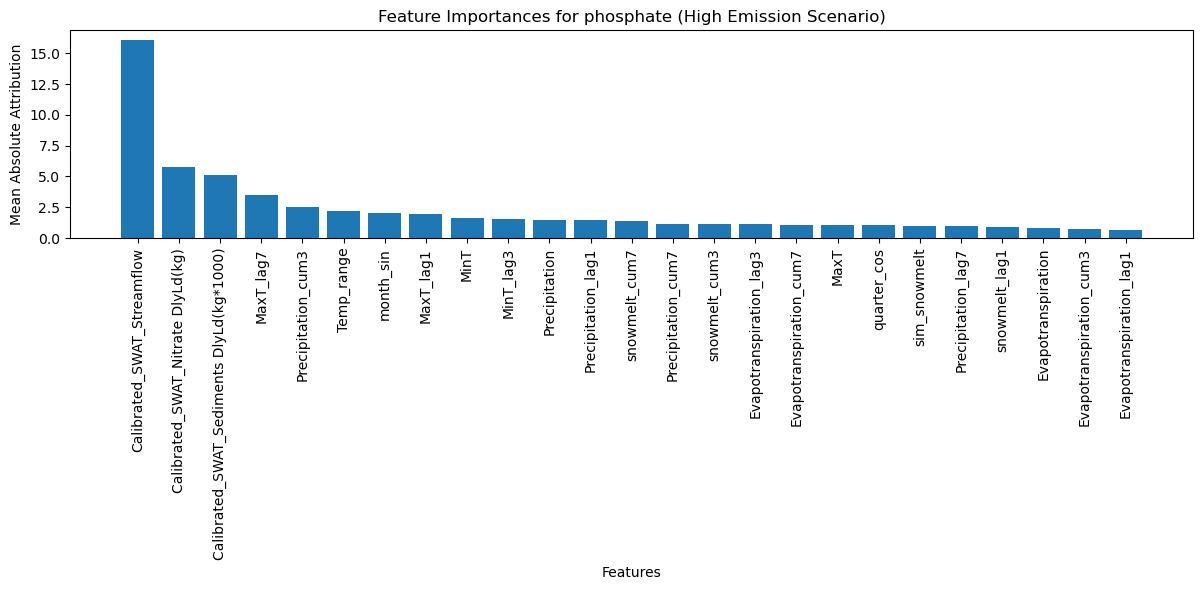

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# --- Compute mean absolute attribution per feature ---
mean_abs_attributions = phosphate_HE_shap[phosphate_HE_features].abs().mean(axis=0)

# --- Sort features by importance ---
sorted_idx = np.argsort(mean_abs_attributions)[::-1]
sorted_features_phosphate_he = mean_abs_attributions.index[sorted_idx]
sorted_importances = mean_abs_attributions.values[sorted_idx]

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_features_phosphate_he)), sorted_importances)
plt.xticks(range(len(sorted_features_phosphate_he)), sorted_features_phosphate_he, rotation=90)
plt.title(f"Feature Importances for phosphate (High Emission Scenario)")
plt.ylabel("Mean Absolute Attribution")
plt.xlabel("Features")
plt.tight_layout()
plt.show()


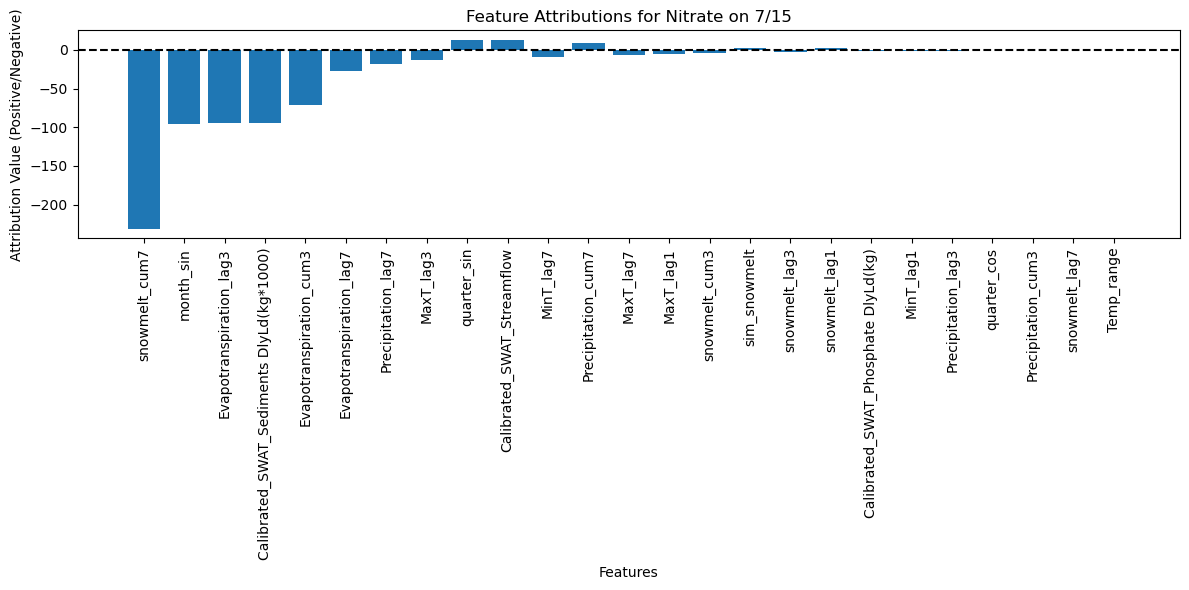

In [44]:
# --- Select a sample by date ---
selected_month = 7  # Example: July
selected_day = 15  # (Optional) Specific day of month

# Filter dataset for selected month and day
nitrate_LE_shap["Date"] = pd.to_datetime(nitrate_LE_shap["Date"])
selected_sample = nitrate_LE_shap[
    (nitrate_LE_shap["Date"].dt.month == selected_month)
    & (nitrate_LE_shap["Date"].dt.day == selected_day)
]

if not selected_sample.empty:
    sample_attributions = selected_sample[nitrate_LE_features].iloc[0]

    sorted_idx = np.argsort(np.abs(sample_attributions))[::-1]
    sorted_features = sample_attributions.index[sorted_idx]
    sorted_values = sample_attributions.values[sorted_idx]

    plt.figure(figsize=(12, 6))
    plt.bar(range(len(sorted_features)), sorted_values)
    plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
    plt.title(f"Feature Attributions for Nitrate on {selected_month}/{selected_day}")
    plt.ylabel("Attribution Value (Positive/Negative)")
    plt.xlabel("Features")
    plt.axhline(0, color="black", linestyle="--")
    plt.tight_layout()

    plt.show()

else:
    print(f"No data available for {selected_month}/{selected_day}")


In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def month_to_quarter(month):
    return f"Q{((month - 1) // 3) + 1}"


def plot_seasonal_violin(attributions_df, target, input_features, top_n=5):
    attributions_df["Date"] = pd.to_datetime(attributions_df["Date"])
    attributions_df["Quarter"] = attributions_df["Date"].dt.month.apply(
        month_to_quarter
    )

    feature_cols = [
        col for col in input_features if col not in ["Date", "Quarter"]
    ]

    # Compute global importance to rank top N features
    global_importance = (
        attributions_df[feature_cols].abs().mean().sort_values(ascending=False)
    )
    top_features = global_importance.head(top_n).index.tolist()

    # Reshape for seaborn violin plot
    long_df = attributions_df[["Quarter"] + top_features].melt(
        id_vars="Quarter", var_name="Feature", value_name="Attribution"
    )

    g = sns.catplot(
        data=long_df,
        x="Attribution",
        y="Feature",
        col="Quarter",
        kind="violin",
        height=4,
        aspect=1,
        sharex=False,
        palette="Blues",
        cut=0,
    )

    g.fig.suptitle(f"SHAP Violin Plots for {target} by Season", fontsize=16, y=1.05)
    g.set_titles("{col_name}")
    g.set_axis_labels("Attribution Value (Impact)", "Features")
    plt.tight_layout()
    plt.show()


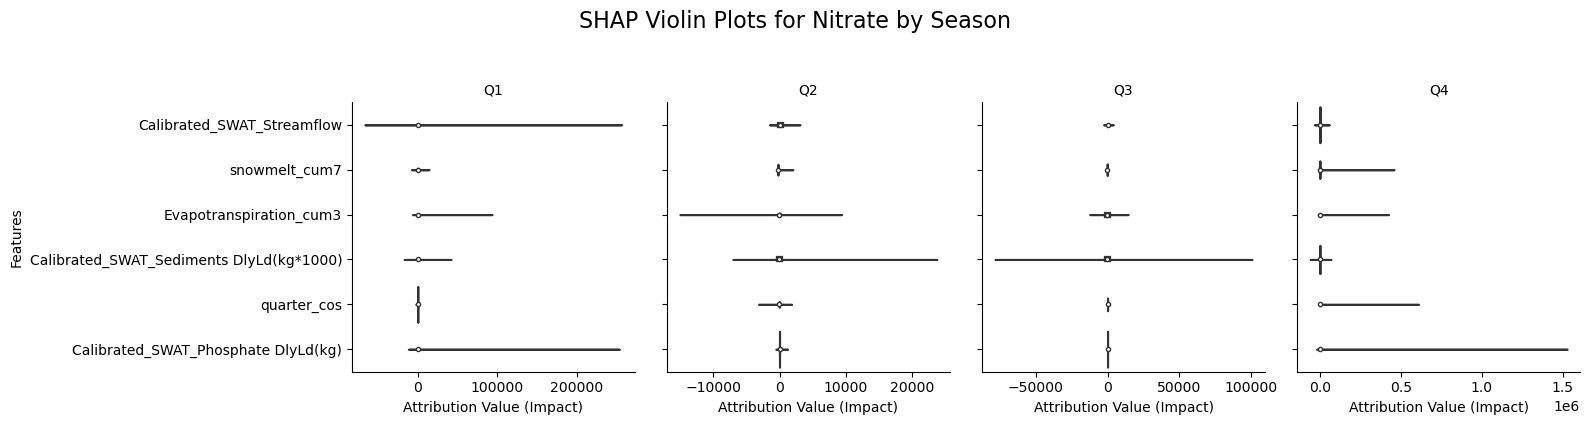

In [46]:
plot_seasonal_violin(nitrate_LE_shap, target="Nitrate",input_features=nitrate_LE_features, top_n=6)


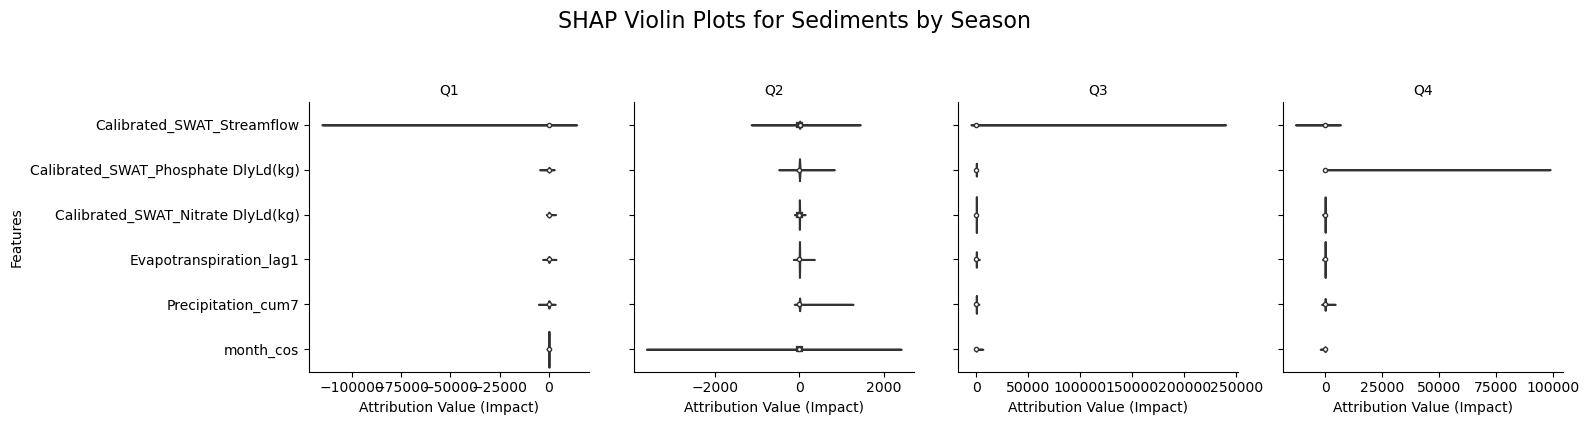

In [47]:
plot_seasonal_violin(
    sediments_LE_shap, target="Sediments", input_features=sediments_LE_features, top_n=6
)


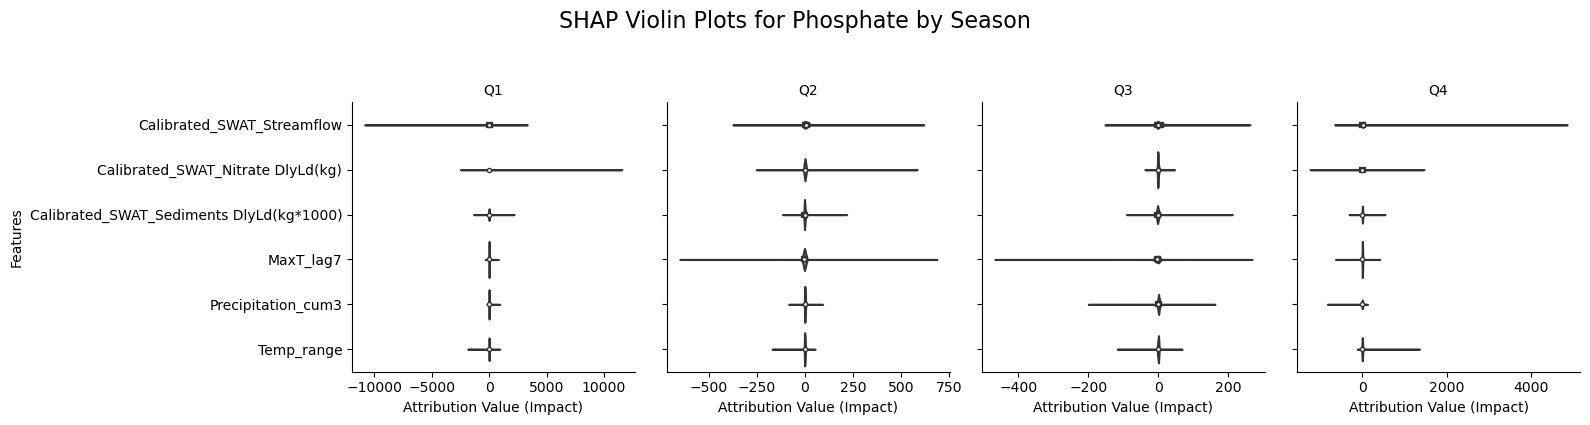

In [48]:
plot_seasonal_violin(
    phosphate_LE_shap, target="Phosphate", input_features=phosphate_LE_features, top_n=6
)


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


def month_to_quarter(month):
    return f"Q{((month - 1) // 3) + 1}"


def plot_integrated_gradients_summary_clean(
    nitrate_attributions_df, nitrate_features, target_name, emission_scenario, top_n=10
):
    df = nitrate_attributions_df.copy()
    df["Date"] = pd.to_datetime(df["Date"])
    df["Month"] = df["Date"].dt.month
    df["Quarter"] = df["Month"].apply(month_to_quarter)

    ## === Select top N features by overall importance ===
    global_importance = df[nitrate_features].abs().mean().sort_values(ascending=False)
    top_features = global_importance.head(top_n).index.tolist()

    ## === 1. Faceted Violin Plots ===
    df_violin = df[["Quarter"] + top_features].melt(
        id_vars="Quarter", var_name="Feature", value_name="Attribution"
    )
    g = sns.catplot(
        data=df_violin,
        x="Attribution",
        y="Feature",
        col="Quarter",
        kind="violin",
        height=4,
        aspect=0.9,
        sharex=False,
        palette="Set2",
        cut=0,
    )
    g.set_titles("Quarter: {col_name}")
    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle(
        f"Seasonal Distribution of Feature Attributions ({target_name} {emission_scenario})", fontsize=14
    )
    g.set_axis_labels("Attribution Value", "Feature")

    ## === 2. Clean Bar Plot ===
    fig2, ax2 = plt.subplots(figsize=(12, 5))
    seasonal_avg = df.groupby("Quarter")[top_features].mean().abs().T
    seasonal_avg.plot(kind="bar", ax=ax2, colormap="tab10")
    ax2.set_title(f"Mean Absolute Attribution by Feature and Quarter ({emission_scenario})")
    ax2.set_ylabel("Mean Absolute Attribution")
    ax2.set_xlabel("Feature")
    ax2.tick_params(axis="x", rotation=90)

    ## === 3. Clean Heatmap ===
    fig3, ax3 = plt.subplots(figsize=(10, 6))
    monthly_avg = df.groupby("Month")[top_features].mean().T
    sns.heatmap(
        monthly_avg,
        cmap="coolwarm",
        center=0,
        linewidths=0.3,
        cbar_kws={"label": "Mean Attribution"},
        ax=ax3,
    )
    ax3.set_title(f"Monthly Average Feature Attribution ({emission_scenario})")
    ax3.set_xlabel("Month")
    ax3.set_ylabel("Feature")

    plt.tight_layout()
    plt.show()


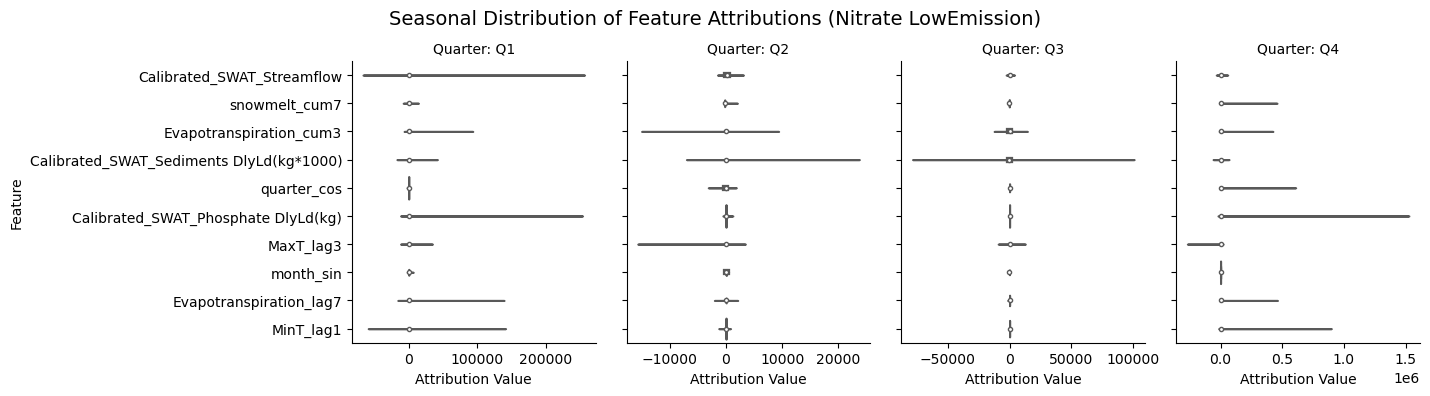

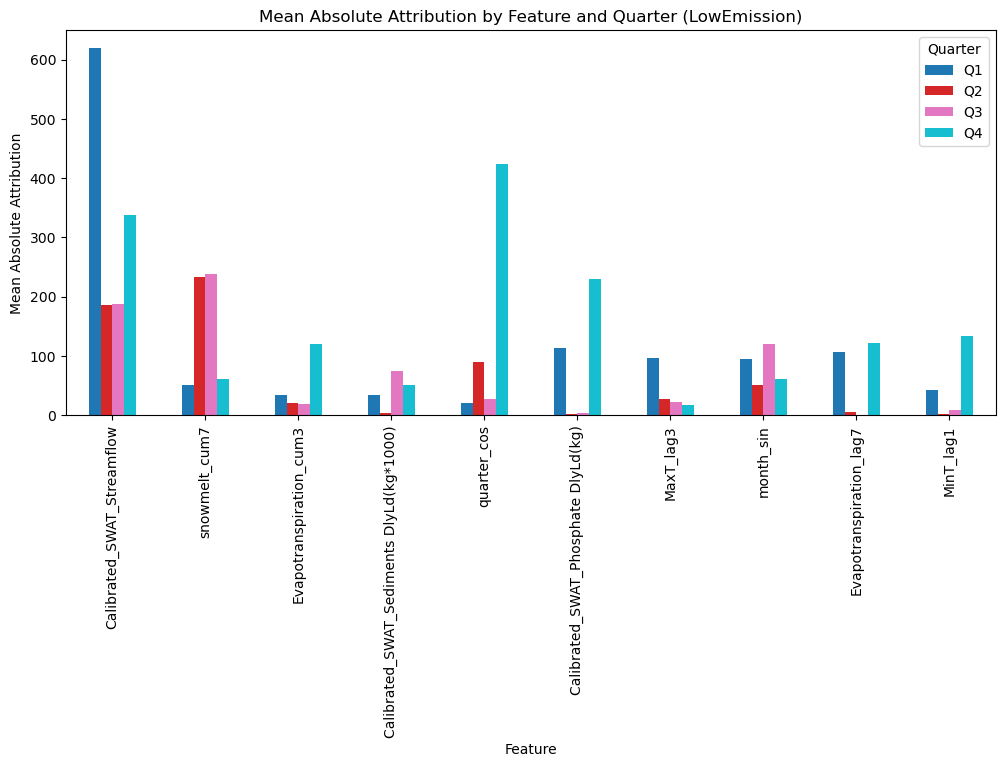

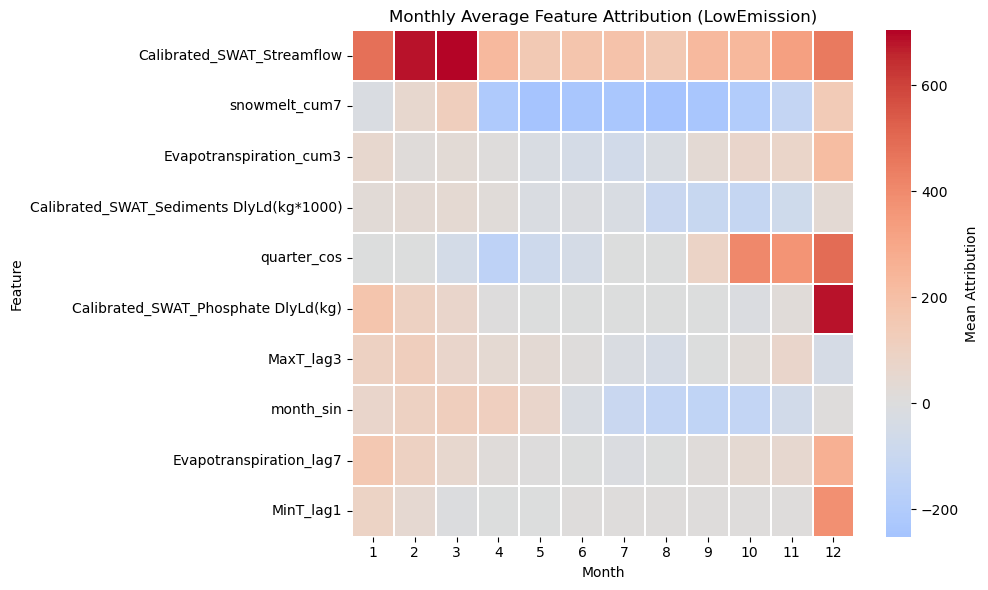

In [50]:
plot_integrated_gradients_summary_clean(
    nitrate_LE_shap, nitrate_LE_features, target_name="Nitrate", emission_scenario="LowEmission"
)


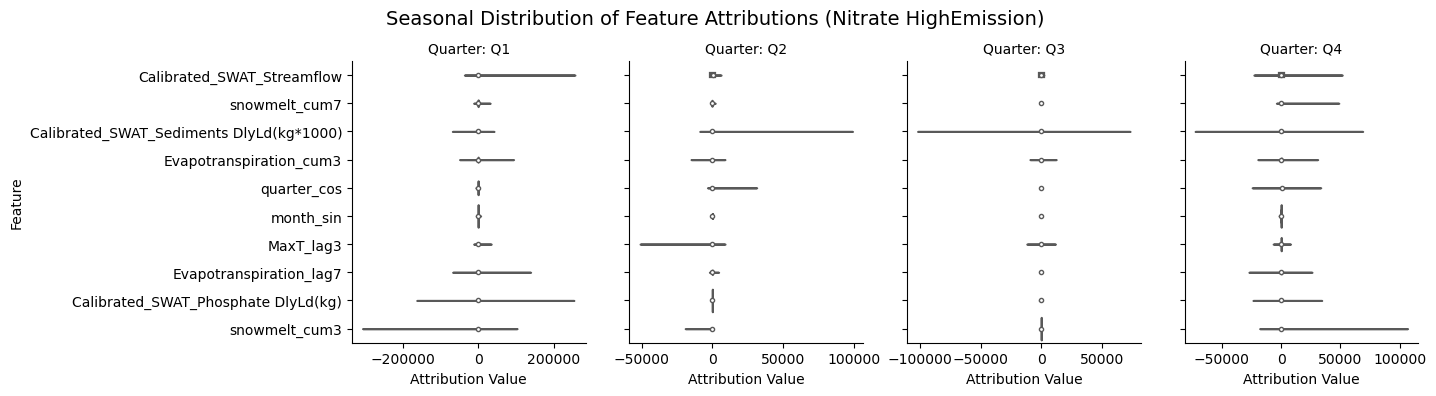

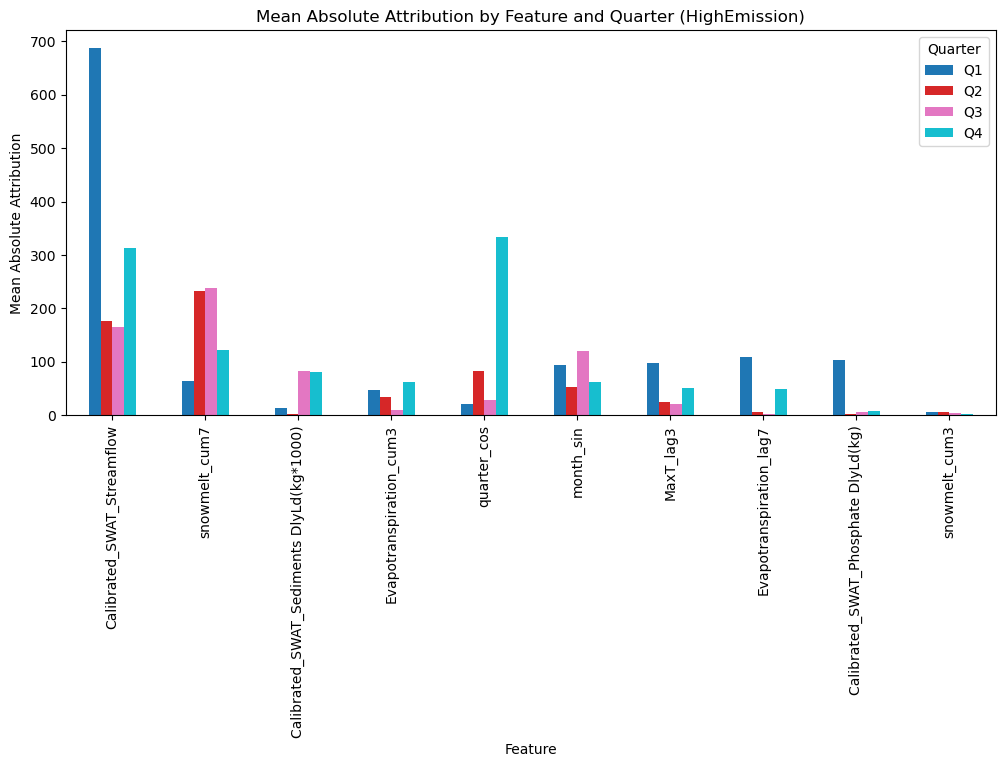

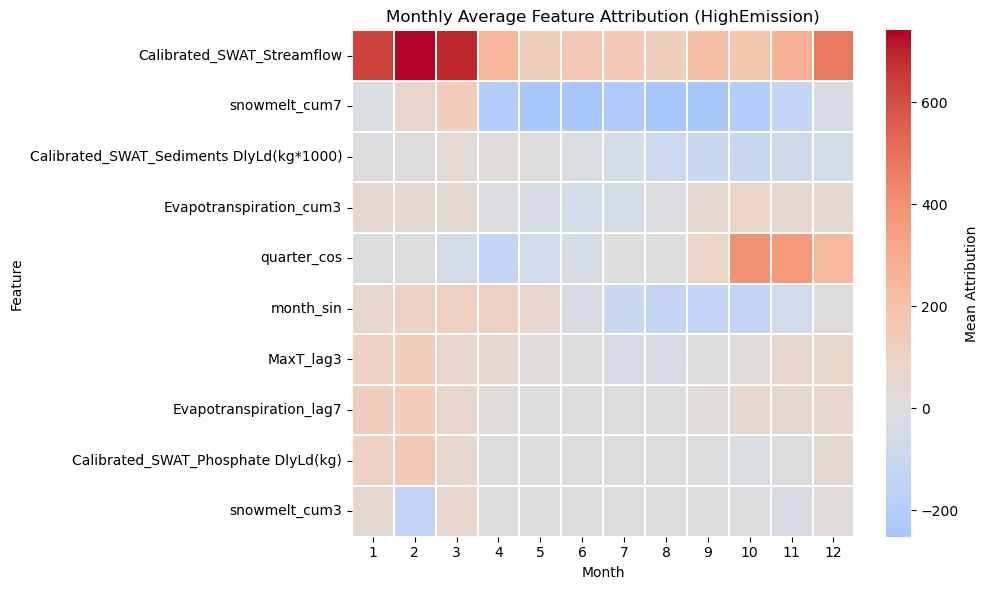

In [51]:
plot_integrated_gradients_summary_clean(
    nitrate_HE_shap,
    nitrate_HE_features,
    target_name="Nitrate",
    emission_scenario="HighEmission",
)


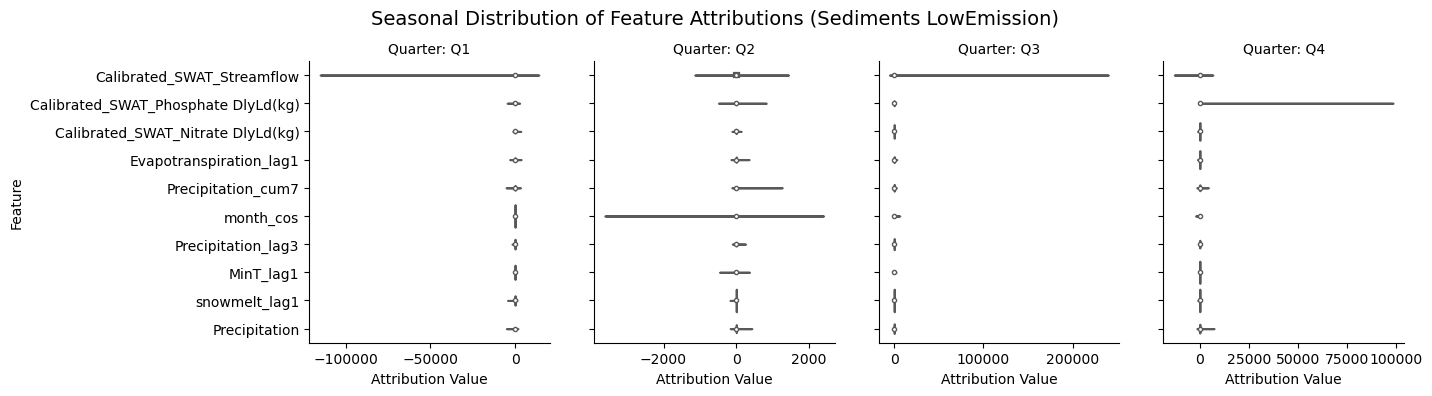

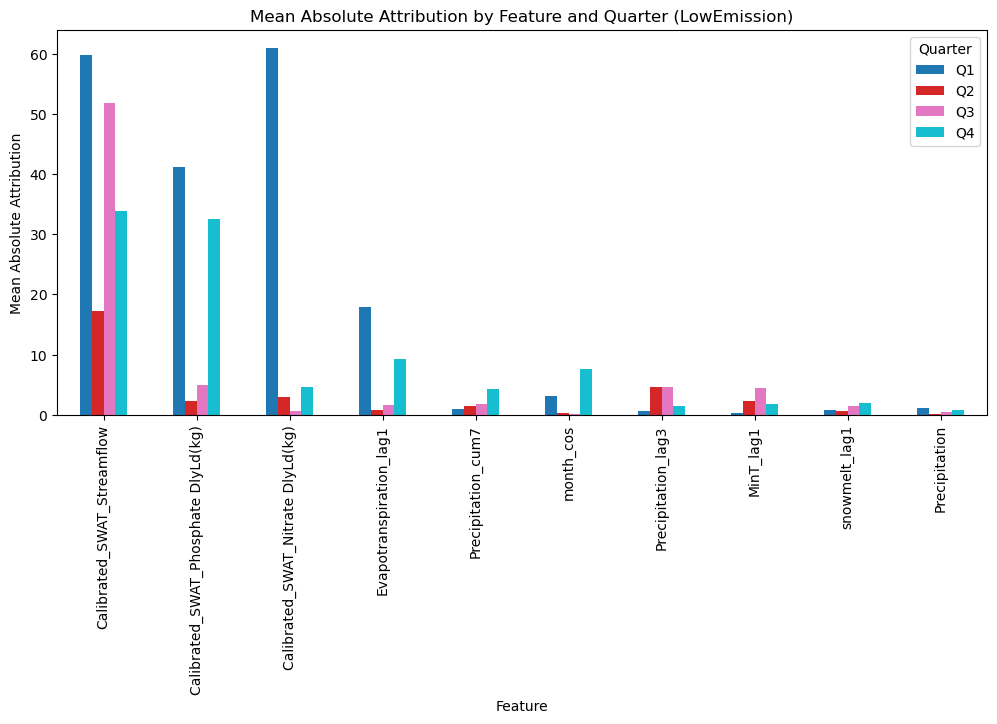

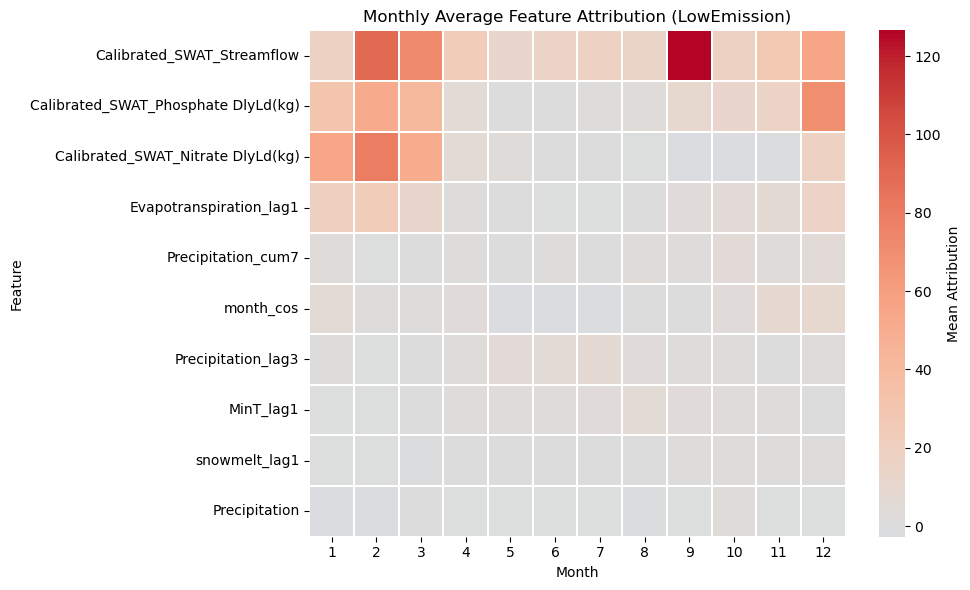

In [52]:
plot_integrated_gradients_summary_clean(
    sediments_LE_shap, sediments_LE_features, target_name="Sediments", emission_scenario="LowEmission"
)

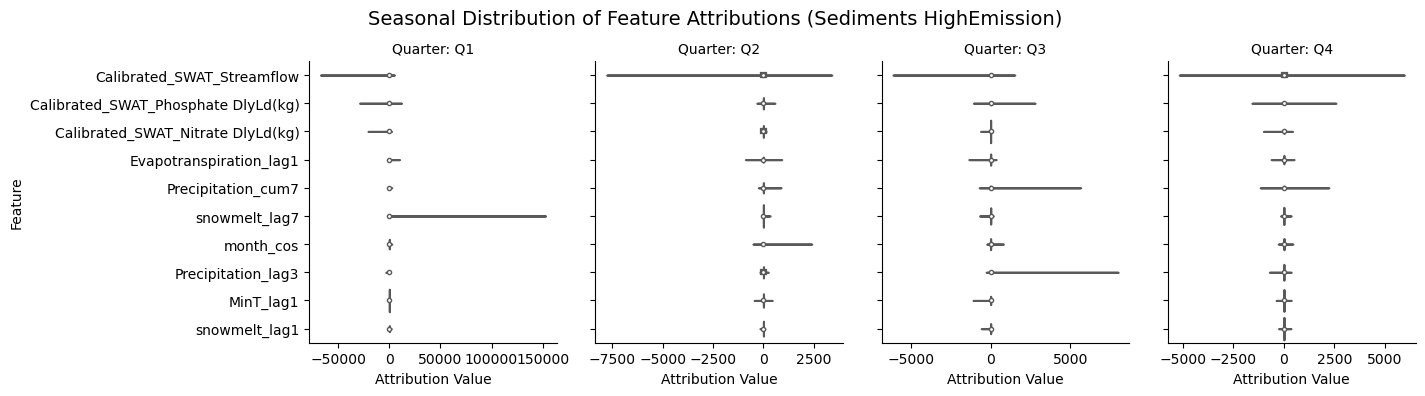

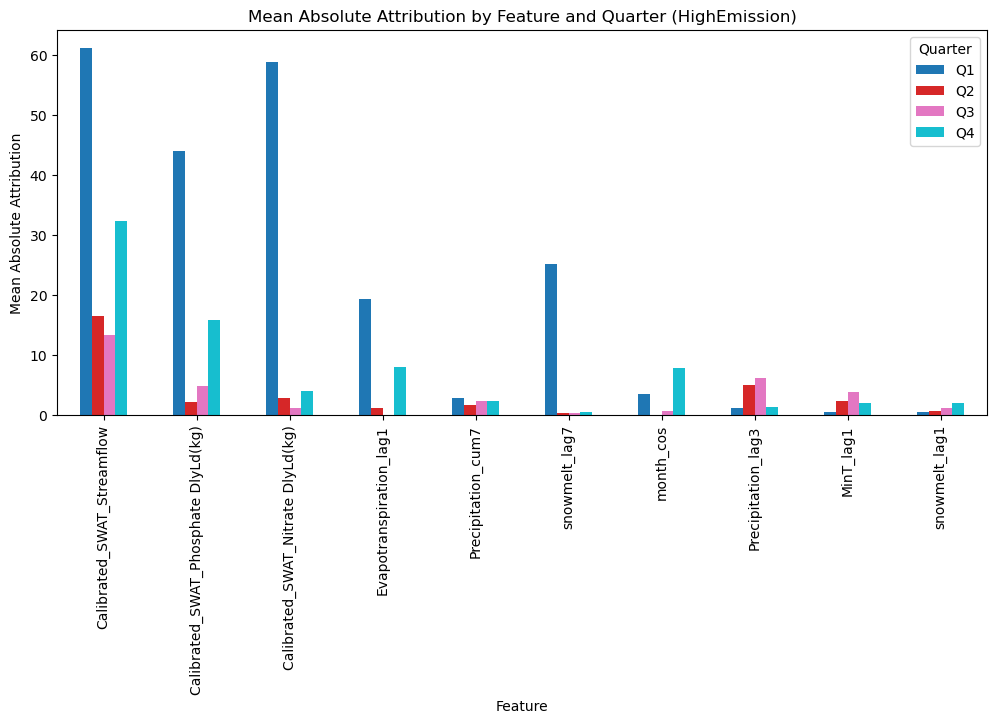

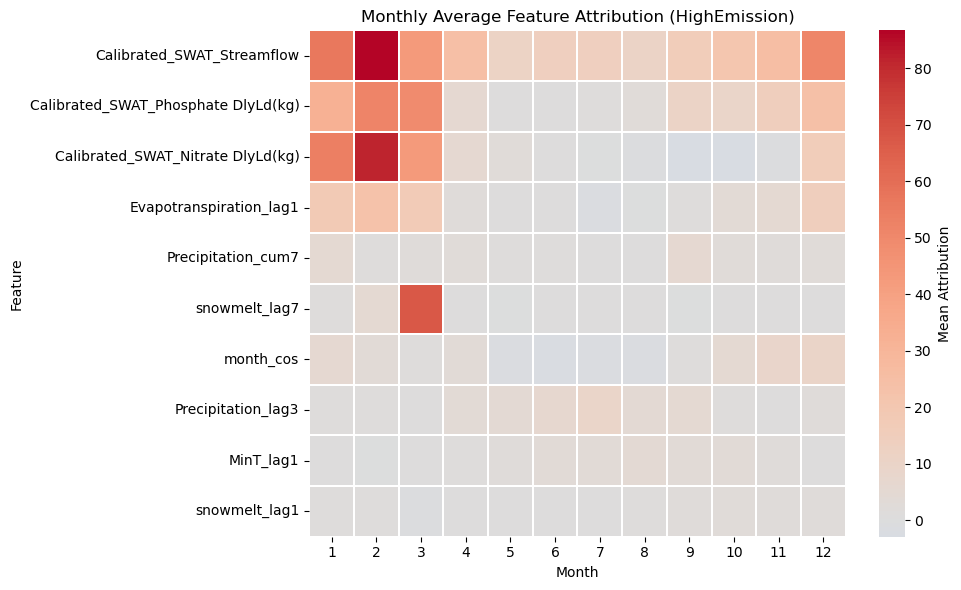

In [53]:
plot_integrated_gradients_summary_clean(
    sediments_HE_shap,
    sediments_HE_features,
    target_name="Sediments",
    emission_scenario="HighEmission",
)


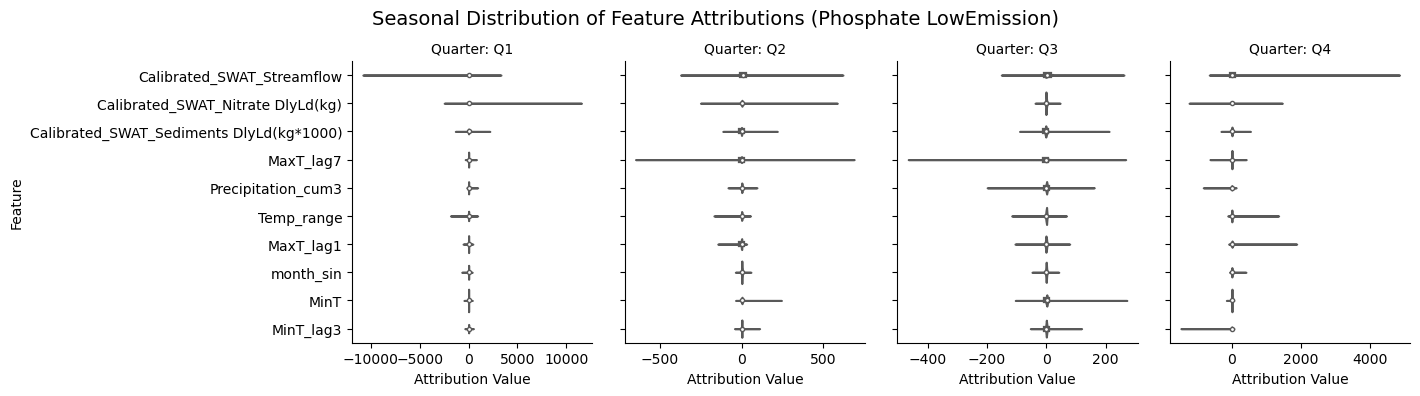

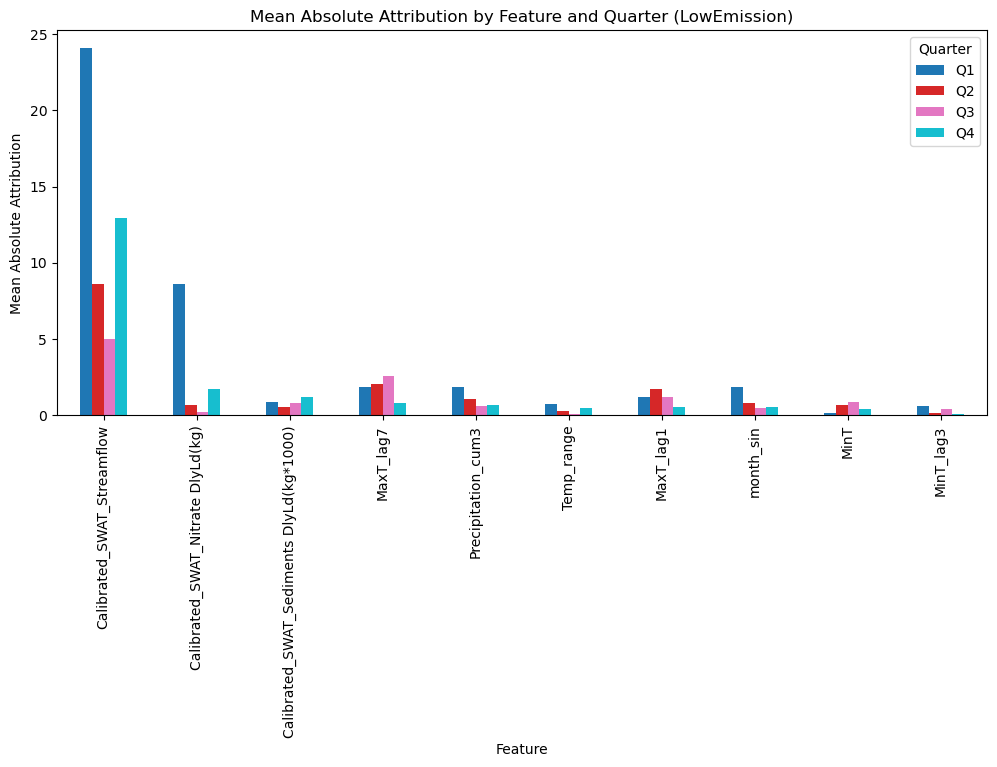

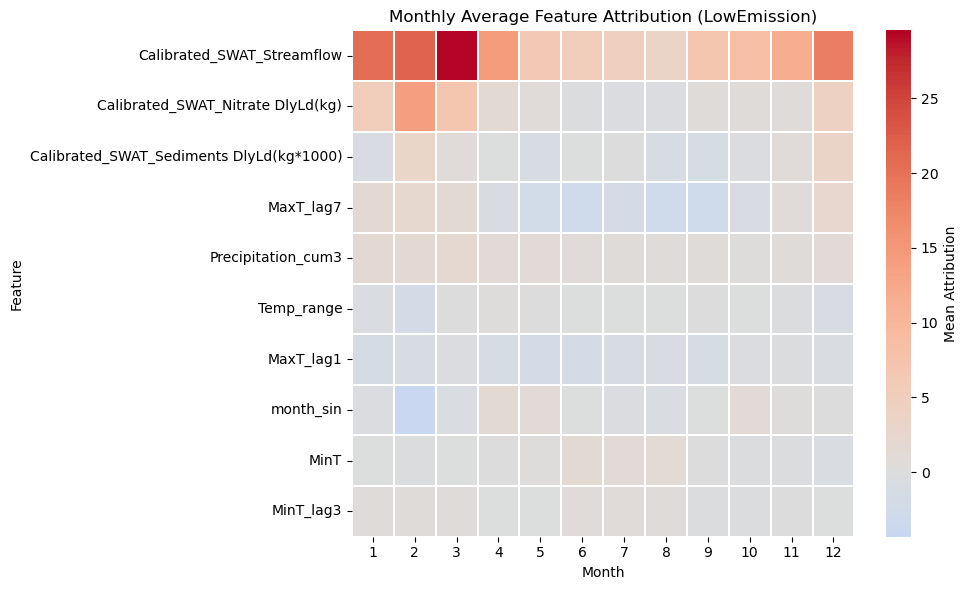

In [54]:
plot_integrated_gradients_summary_clean(
    phosphate_LE_shap,
    phosphate_LE_features,
    target_name="Phosphate",
    emission_scenario="LowEmission",
)


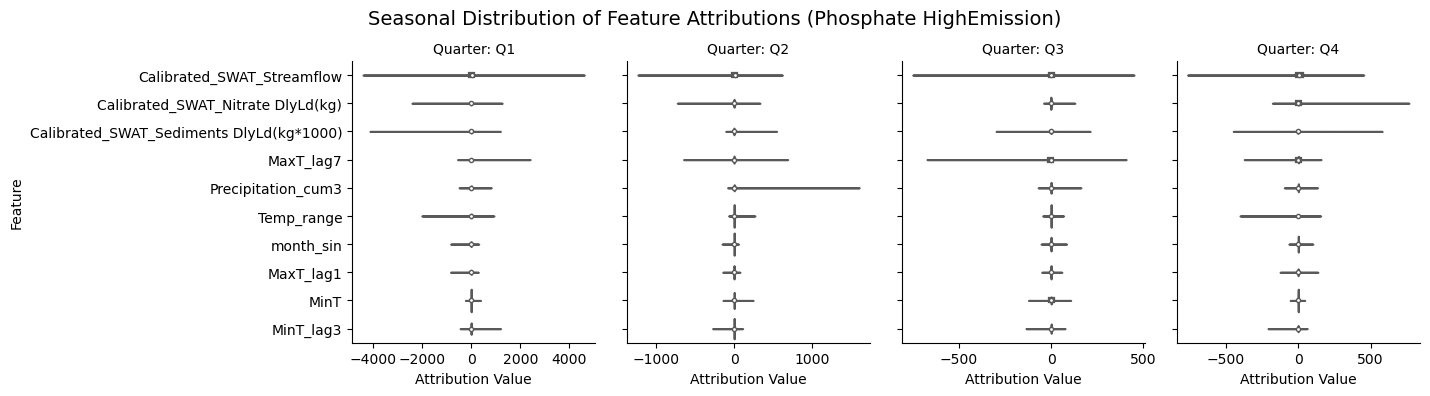

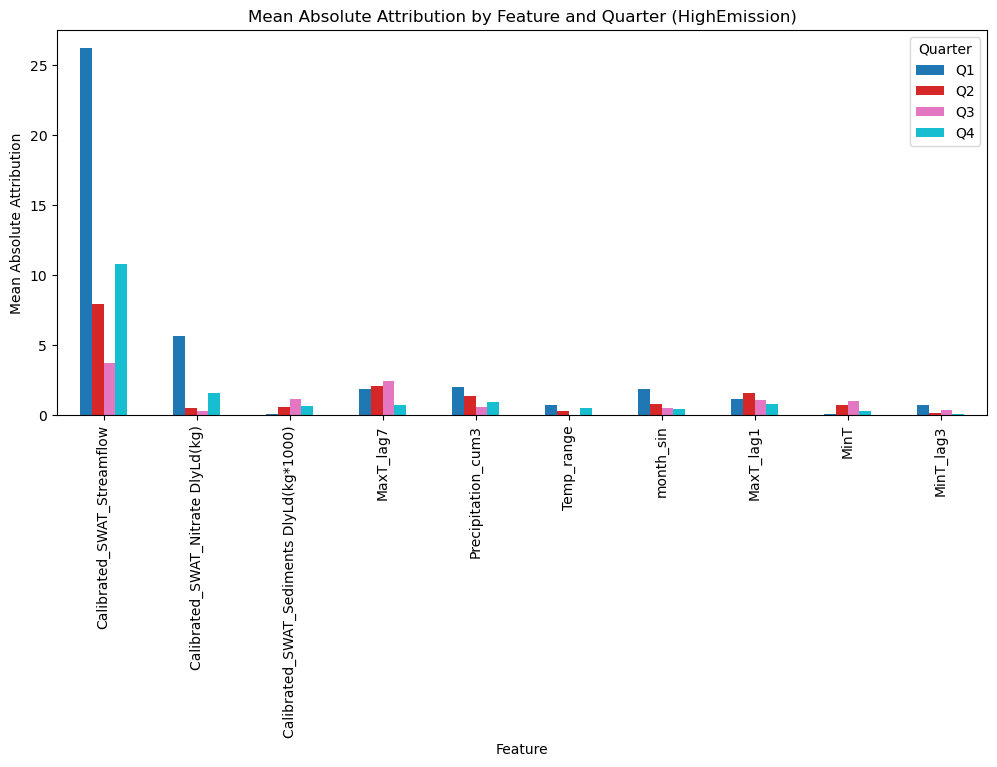

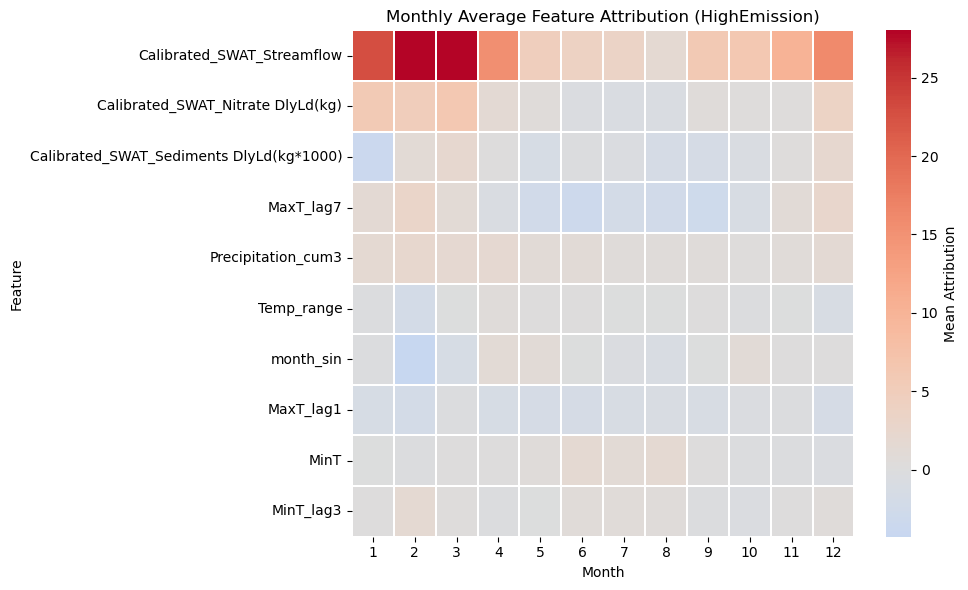

In [55]:
plot_integrated_gradients_summary_clean(
    phosphate_HE_shap,
    phosphate_HE_features,
    target_name="Phosphate",
    emission_scenario="HighEmission",
)

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_ig_attribution_boxplot(attributions_df, features, target_name, emission_scenario):
    df = attributions_df.copy()
    df["Date"] = pd.to_datetime(df["Date"])
    df["Month"] = df["Date"].dt.month
    df["Month Name"] = df["Date"].dt.month_name()

    # Order months chronologically
    month_order = [
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ]

    # Reshape to long format
    df_long = df[["Month Name"] + features].melt(
        id_vars="Month Name", var_name="Feature", value_name="Attribution"
    )

    # Ensure correct month order
    df_long["Month Name"] = pd.Categorical(
        df_long["Month Name"], categories=month_order, ordered=True
    )

    # Plot
    plt.figure(figsize=(14, 6))
    sns.boxplot(
        data=df_long,
        x="Month Name",
        y="Attribution",
        hue="Feature",
        palette="Set2",
        fliersize=2,
    )
    plt.title(f"Monthly Attribution of Top Features ({target_name}, {emission_scenario})", fontsize=14)
    plt.axhline(0, color="gray", linestyle="--")
    plt.ylabel("Integrated Gradients Attribution")
    plt.xlabel("Month")
    plt.xticks(rotation=45)
    plt.legend(title="Feature", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


/Users/azamkhan/anaconda3/envs/nasa/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/azamkhan/anaconda3/envs/nasa/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


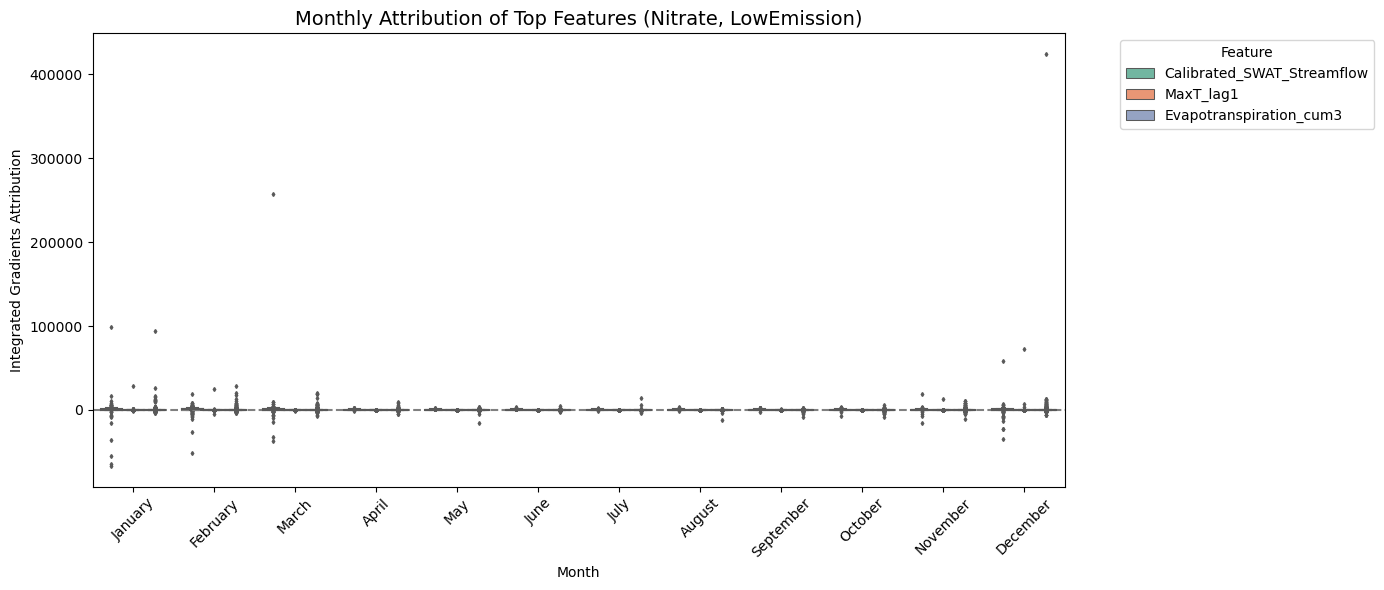

In [57]:
top_features = ["Calibrated_SWAT_Streamflow", "MaxT_lag1", "Evapotranspiration_cum3"]
plot_ig_attribution_boxplot(
    nitrate_LE_shap, top_features, target_name="Nitrate", emission_scenario="LowEmission", 
)


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def plot_combined_impact_and_attribution(
    future_data,
    historical_data,
    nitrate_attributions_df,
    target="Nitrate",
    emission_scenario="HighEmission",
    features=["Calibrated_SWAT_Streamflow", "MaxT_lag1", "Evapotranspiration_cum3"],
):
    ## --- Clean and prepare impact data ---
    future_df = future_data.copy()
    future_df = future_df[future_df["Scenario"] == emission_scenario]
    historical_df = historical_data.copy()

    # Format dates
    for df in [future_df, historical_df]:
        if pd.api.types.is_period_dtype(df["Date"]):
            df["Date"] = df["Date"].dt.to_timestamp()
        df["Month"] = pd.to_datetime(df["Date"]).dt.strftime("%B")

    # Reference: historical monthly means
    hist_monthly = (
        historical_df[historical_df["Target"] == target]
        .groupby("Month")["Predicted"]
        .mean()
        .rename("Reference")
        .reset_index()
    )

    # Compute % difference
    future_target_df = future_df[future_df["Target"] == target].copy()
    future_target_df = future_target_df.merge(hist_monthly, on="Month")
    future_target_df["Pct_Diff"] = (
        (future_target_df["Predicted"] - future_target_df["Reference"])
        / future_target_df["Reference"]
    ) * 100

    ## --- Clean and prepare IG attribution data ---
    attr_df = nitrate_attributions_df.copy()
    attr_df["Date"] = pd.to_datetime(attr_df["Date"])
    attr_df["Month"] = attr_df["Date"].dt.strftime("%B")

    # Long format for IG boxplot
    attr_long = attr_df[["Month"] + features].melt(
        id_vars="Month", var_name="Feature", value_name="Attribution"
    )

    # Month order
    month_order = [
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ]
    attr_long["Month"] = pd.Categorical(
        attr_long["Month"], categories=month_order, ordered=True
    )
    future_target_df["Month"] = pd.Categorical(
        future_target_df["Month"], categories=month_order, ordered=True
    )

    ## --- Plot side-by-side panels ---
    fig, axs = plt.subplots(
        2, 1, figsize=(15, 10), sharex=True, gridspec_kw={"hspace": 0.3}
    )

    # --- Top panel: % Difference Boxplot ---
    sns.boxplot(
        ax=axs[0],
        data=future_target_df,
        x="Month",
        y="Pct_Diff",
        color="skyblue",
        showfliers=False,
        width=0.6,
    )
    axs[0].axhline(0, color="gray", linestyle="--", alpha=0.5)
    axs[0].set_ylabel("% Difference from Historical")
    axs[0].set_title(
        f"{target}: Future vs Historical % Difference ({emission_scenario})"
    )

    # --- Bottom panel: IG Attribution Boxplot ---
    sns.boxplot(
        ax=axs[1],
        data=attr_long,
        x="Month",
        y="Attribution",
        hue="Feature",
        palette="Set2",
        showfliers=False,
    )
    axs[1].axhline(0, color="gray", linestyle="--", alpha=0.5)
    axs[1].set_ylabel("Integrated Gradients Attribution")
    axs[1].set_title(f"{target}: IG Feature Attributions Across Months")
    axs[1].legend(title="Feature", bbox_to_anchor=(1.05, 1), loc="upper left")

    # Clean up x-axis
    axs[1].tick_params(axis="x", rotation=45)
    axs[0].tick_params(axis="x", rotation=45)
    axs[1].set_xlabel("Month")
    axs[0].set_xlabel("")

    plt.tight_layout()
    plt.show()


/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/2989162623.py:10: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(future_data["Date"]):
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/2989162623.py:16: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(historical_data["Date"]):


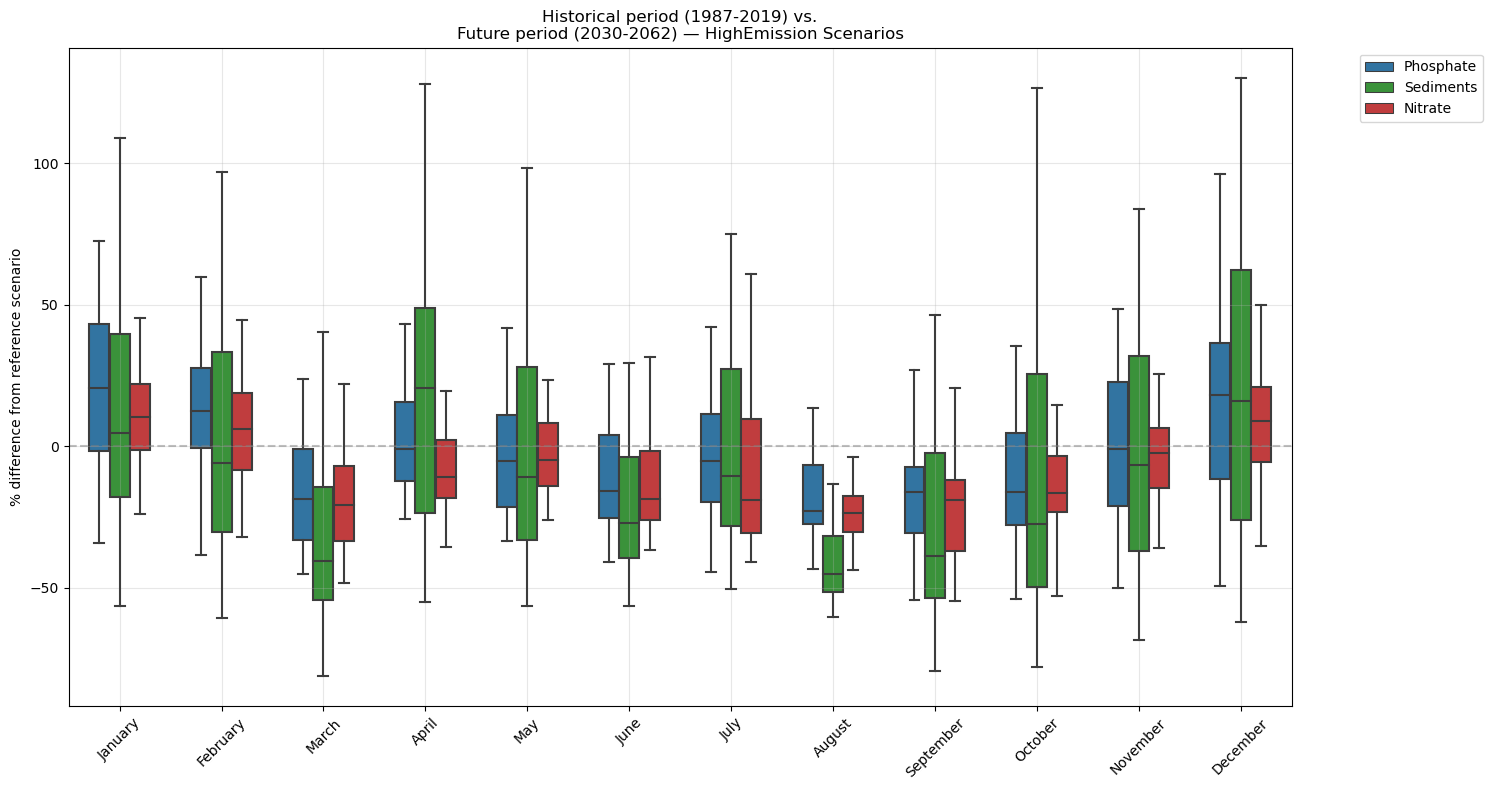

In [59]:
he = plot_monthly_comparison(
    future_data_ensemble_monthly,
    historical_data_ensemble_monthly,
    emission_scenario="HighEmission",
)


/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/1738323358.py:21: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df["Date"]):
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/1738323358.py:21: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df["Date"]):
/Users/azamkhan/anaconda3/envs/nasa/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/azamkhan/anaconda3/envs/nasa/lib/python3.11/site-packages/seaborn/categorical.py:641: F

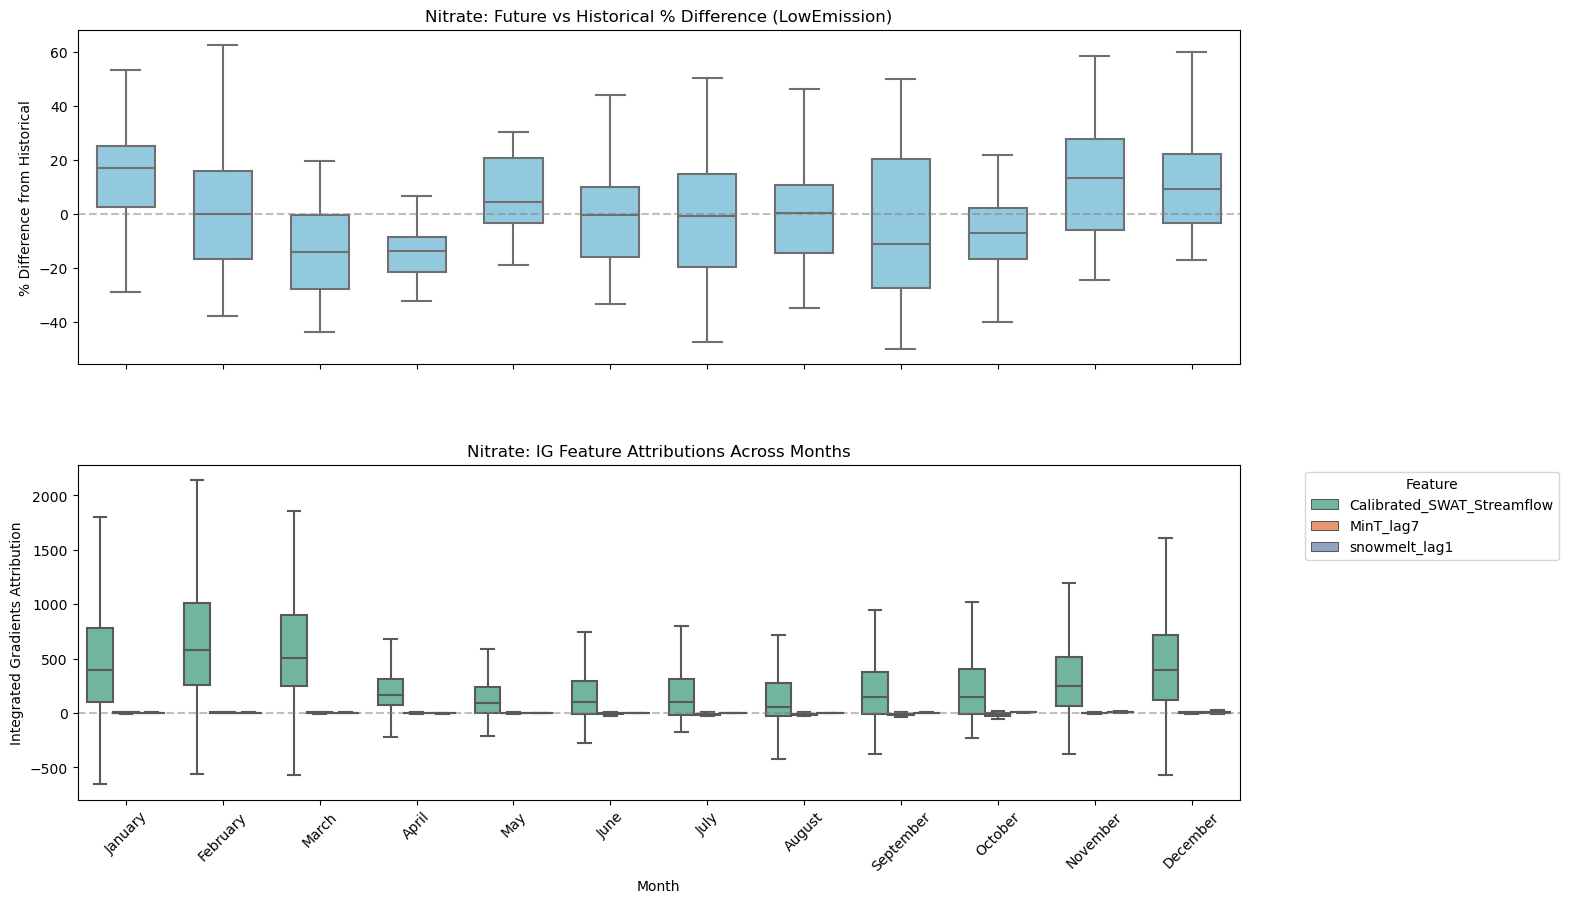

In [60]:
plot_combined_impact_and_attribution(
    future_data=future_data_ensemble_monthly,
    historical_data=historical_data_ensemble_monthly,
    nitrate_attributions_df=nitrate_LE_shap,
    target="Nitrate",
    emission_scenario="LowEmission",
    features=["Calibrated_SWAT_Streamflow", "MinT_lag7", "snowmelt_lag1"],
)


/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/1738323358.py:21: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df["Date"]):
/var/folders/6l/d525srpn1tl8c1jw2pxxkr3m0000gn/T/ipykernel_31550/1738323358.py:21: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df["Date"]):
/Users/azamkhan/anaconda3/envs/nasa/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/azamkhan/anaconda3/envs/nasa/lib/python3.11/site-packages/seaborn/categorical.py:641: F

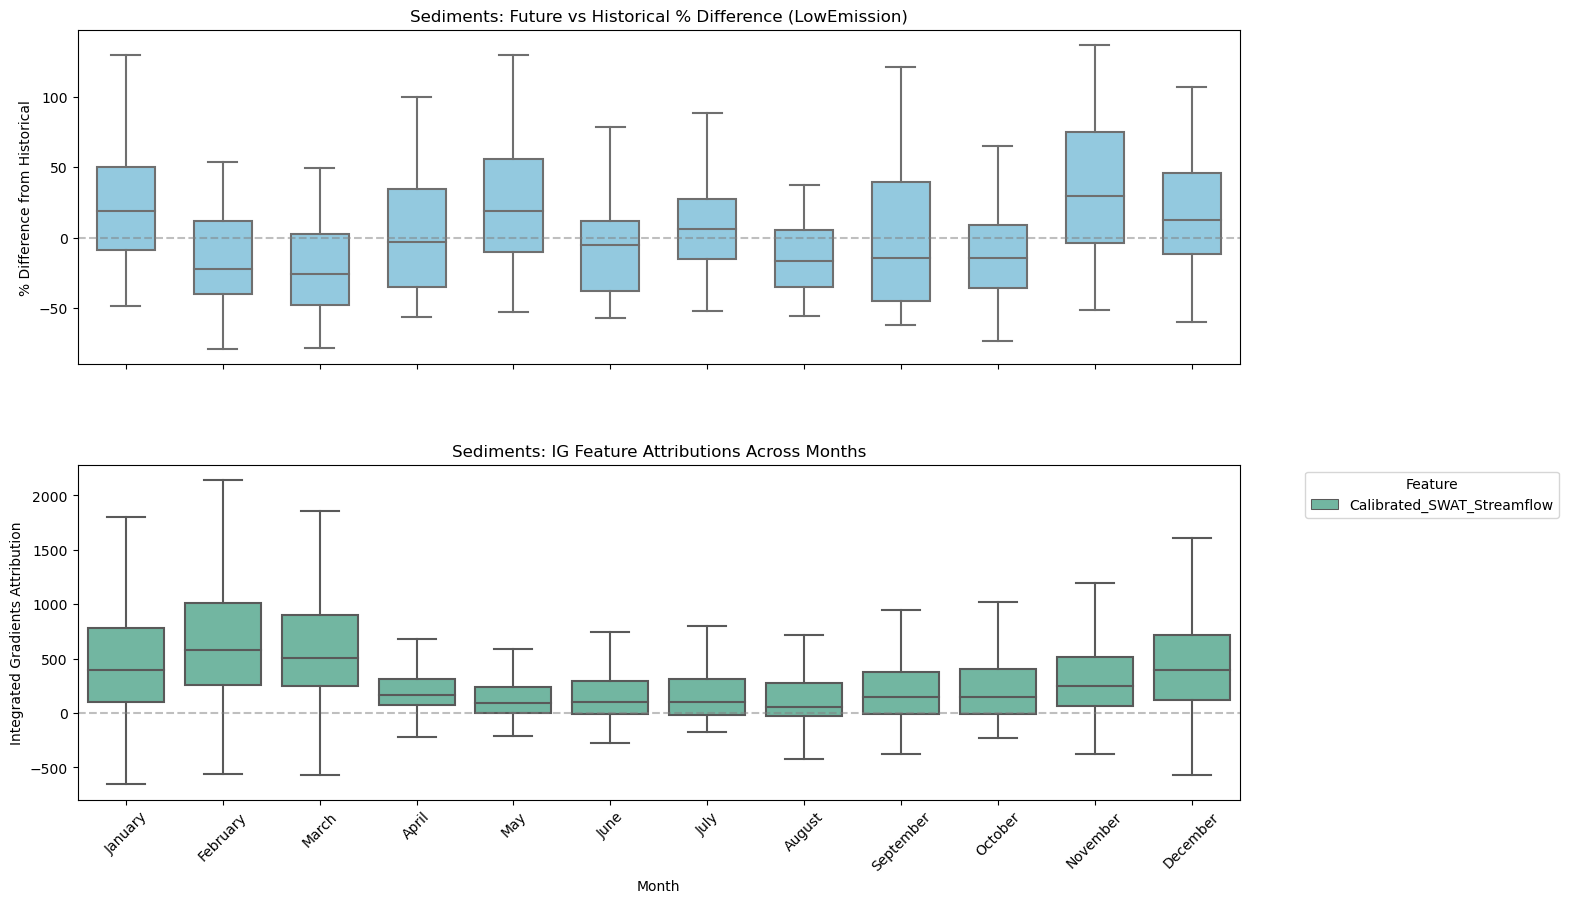

In [61]:
plot_combined_impact_and_attribution(
    future_data=future_data_ensemble_monthly,
    historical_data=historical_data_ensemble_monthly,
    nitrate_attributions_df=nitrate_LE_shap,
    target="Sediments",
    emission_scenario="LowEmission",
    features=["Calibrated_SWAT_Streamflow"], # "Calibrated_SWAT_Phosphate_DlyLd(kg*1000)" is the most important feature for sediments
)


In [62]:
def plot_monthly_ig_vs_prediction_variability(
    attributions_df, predictions_df, features, target
):
    """
    Overlays monthly prediction variability with mean IG attribution variability across selected features.
    Includes a legend in the top right corner.
    """
    import pandas as pd
    import matplotlib.pyplot as plt

    # Prep attribution data
    attr_df = attributions_df.copy()
    attr_df["Date"] = pd.to_datetime(attr_df["Date"])
    attr_df["Month"] = attr_df["Date"].dt.month
    attr_df["Month Name"] = attr_df["Date"].dt.month_name()
    month_order = [
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ]

    # Compute attribution std per feature per month
    attr_std = (
        attr_df.groupby("Month Name")[features].std().mean(axis=1).reindex(month_order)
    )

    # Prep prediction data
    pred_df = predictions_df.copy()
    pred_df["Date"] = pd.to_datetime(pred_df["Date"])
    pred_df = pred_df[pred_df["Target"] == target]
    pred_df["Month Name"] = pred_df["Date"].dt.month_name()
    pred_std = pred_df.groupby("Month Name")["Predicted"].std().reindex(month_order)

    # Plot overlay
    fig, ax1 = plt.subplots(figsize=(14, 6))

    (line1,) = ax1.plot(
        month_order, pred_std, marker="o", label="Prediction Std Dev", color="tab:blue"
    )
    ax1.set_ylabel("Prediction Std Dev", color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    ax2 = ax1.twinx()
    (line2,) = ax2.plot(
        month_order,
        attr_std,
        marker="o",
        label="Mean IG Attribution Std",
        color="tab:red",
    )
    ax2.set_ylabel("Mean IG Attribution Std", color="tab:red")
    ax2.tick_params(axis="y", labelcolor="tab:red")

    # Add combined legend to top right corner
    lines = [line1, line2]
    labels = [line.get_label() for line in lines]
    ax1.legend(lines, labels, loc="upper right", frameon=True)

    plt.title(f"Monthly Prediction vs Attribution Variability — {target}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [63]:
def plot_ig_attribution_std_heatmap(attributions_df, features, target):
    """
    Heatmap of attribution std per feature across months.
    """
    df = attributions_df.copy()
    df["Date"] = pd.to_datetime(df["Date"])
    df["Month"] = df["Date"].dt.month
    df["Month Name"] = df["Date"].dt.month_name()

    # Order months
    month_order = [
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ]

    heat_data = df.groupby("Month Name")[features].std().T.reindex(columns=month_order)

    plt.figure(figsize=(14, 6))
    sns.heatmap(heat_data, cmap="coolwarm", cbar_kws={"label": "Attribution Std Dev"})
    plt.title(f"Monthly Attribution Variability (Std Dev) — {target}")
    plt.xlabel("Month")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()


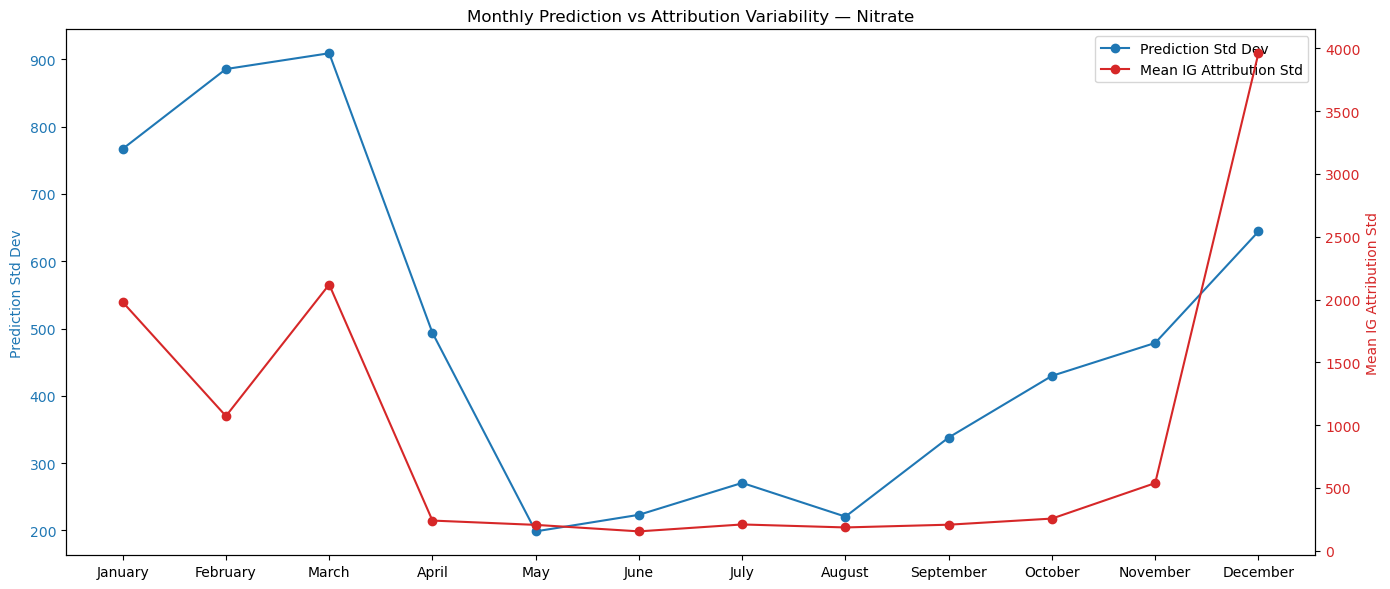

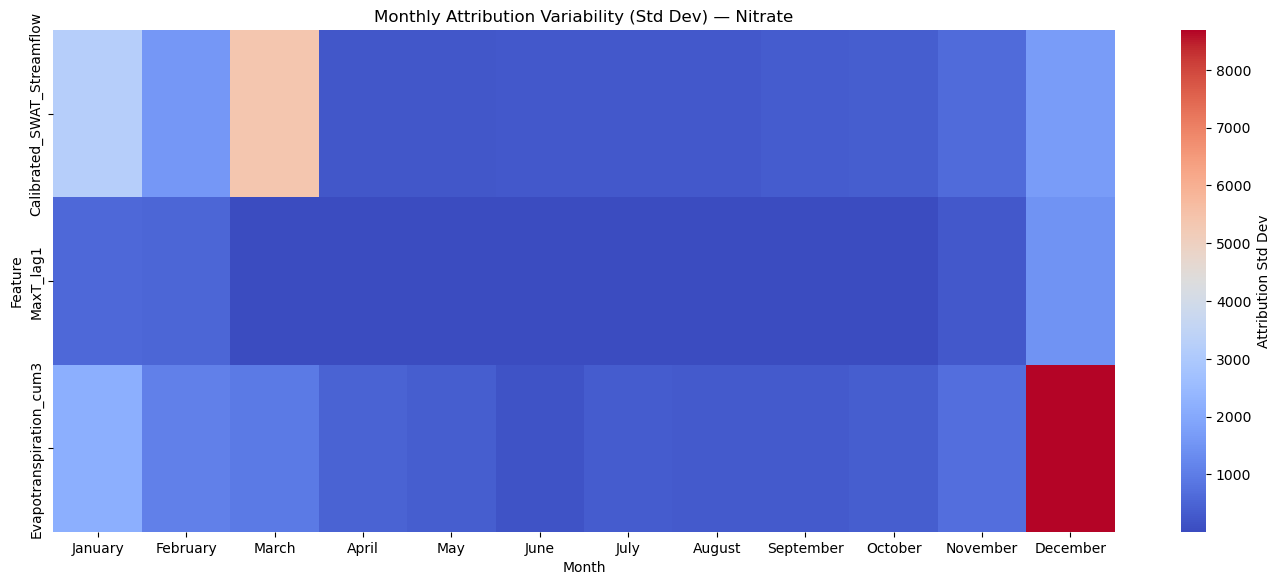

In [65]:
plot_monthly_ig_vs_prediction_variability(
    nitrate_LE_shap,
    future_data_ensemble,
    features=top_features,
    target="Nitrate",
)

plot_ig_attribution_std_heatmap(
    nitrate_LE_shap, features=top_features, target="Nitrate"
)
